In [ ]:
import datetime
#import logging as log
import os
#import pickle
import random
from collections import deque

import numpy as np
from keras.layers import Conv2D, Dense, Flatten, BatchNormalization, Activation
from keras.models import Sequential
from keras.optimizers import Adam
from retro_contest.local import make
import gym_remote.exceptions as gre

C:\Users\cenarugu\AppData\Local\Continuum\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
import sys
#Install
#De som bruker Windows må kjøre denne kommandoen først:
#pip install pandas
#pip install keras
#pip install gym
#pip install --no-index -f https://github.com/Kojoley/atari-py/releases atari_py
#pip install gym[atari]

## OpenAi Gym

In this tutorial we will be using the OpenAi Gym library. OpenAi is a company that is doing research on reinforcement learning and provides us a easy to use library called Gym that can simulate reinforcment environments which we can interact with.

Gym can be installed using the pip command:

pip install gym

#### Example code

The code below shows example of using the Gym library and is the code you need to know about Gym for implementing reinforcement learning. The code simulates the CartPole environment and performs random action on each frame. This means that it won't learn anything.

In [4]:
# Import the gym module
import gym

# Create a breakout environment
env = gym.make('CartPole-v0')
# Reset it, returns the starting frame
frame = env.reset()
# Render
env.render()

is_done = False
step=0
while not is_done:
  # Perform a random action, returns the new frame, reward and whether the game is over
  frame, reward, is_done, _ = env.step(env.action_space.sample())
  # Render.
  step=step+1
  print("step: %.1f reward: %.1f is_done: %s"%(step, reward, is_done) )

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
step: 1.0 reward: 1.0 is_done: False
step: 2.0 reward: 1.0 is_done: False
step: 3.0 reward: 1.0 is_done: False
step: 4.0 reward: 1.0 is_done: False
step: 5.0 reward: 1.0 is_done: False
step: 6.0 reward: 1.0 is_done: False
step: 7.0 reward: 1.0 is_done: False
step: 8.0 reward: 1.0 is_done: False
step: 9.0 reward: 1.0 is_done: False
step: 10.0 reward: 1.0 is_done: False
step: 11.0 reward: 1.0 is_done: False
step: 12.0 reward: 1.0 is_done: False
step: 13.0 reward: 1.0 is_done: False
step: 14.0 reward: 1.0 is_done: False
step: 15.0 reward: 1.0 is_done: False
step: 16.0 reward: 1.0 is_done: False
step: 17.0 reward: 1.0 is_done: False
step: 18.0 reward: 1.0 is_done: False
step: 19.0 reward: 1.0 is_done: False
step: 20.0 reward: 1.0 is_done: False
step: 21.0 reward: 1.0 is_done: False
step: 22.0 reward: 1.0 is_done: True


## Deep Reinforcment Learning

## Implementing Deep Q Neural Network with Keras

### Breakout

In [36]:
import gym
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Imports specifically so we can render outputs in Jupyter.
from JSAnimation.IPython_display import display_animation
from matplotlib import animation
from IPython.display import display

def display_frames_as_gif(frames):
    """
    Displays a list of frames as a gif, with controls
    """
    plt.figure(figsize=(frames[0].shape[1] / 30.0, frames[0].shape[0] / 30.0), dpi = 72)
    patch = plt.imshow(frames[0], cmap='gray')
    plt.axis('off')

    def animate(i):
        patch.set_data(frames[i])

    anim = animation.FuncAnimation(plt.gcf(), animate, frames = len(frames), interval=30)
    display(display_animation(anim, default_mode='loop'))


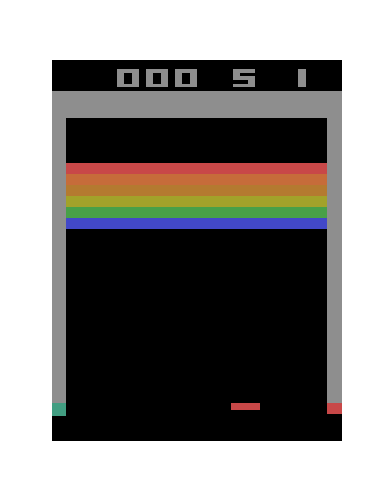
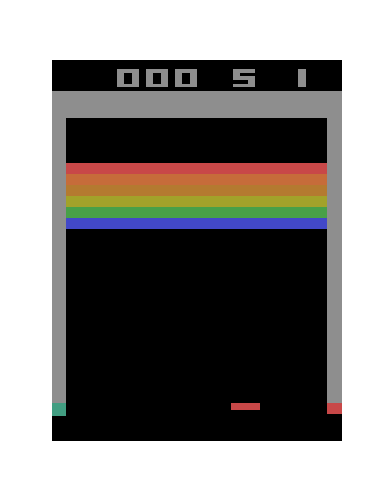
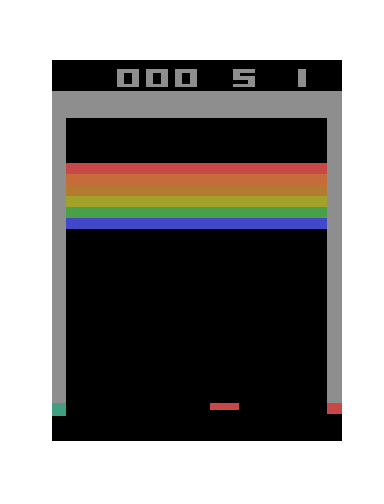
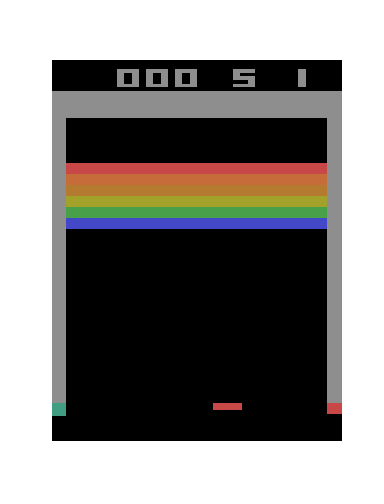
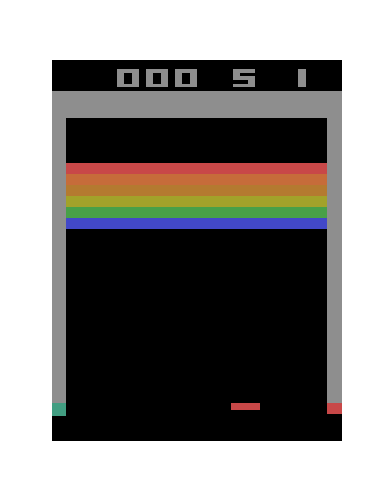
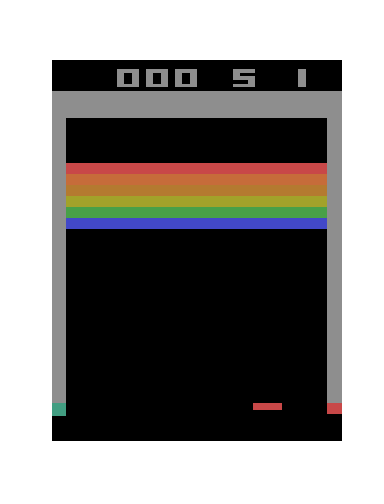
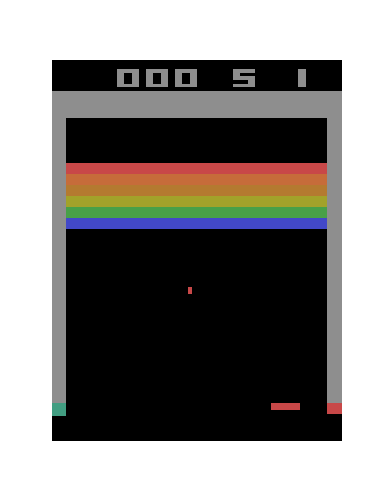
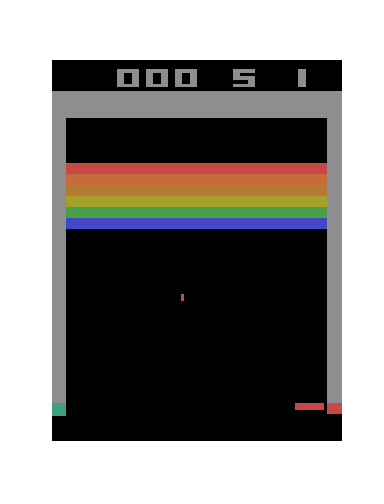
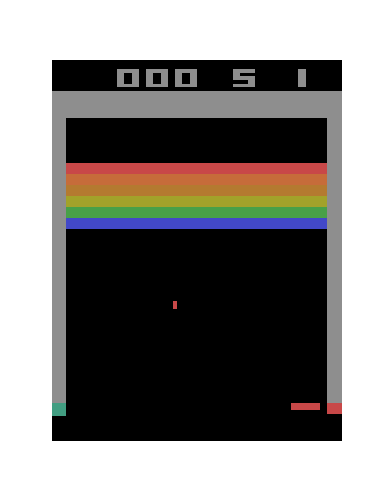
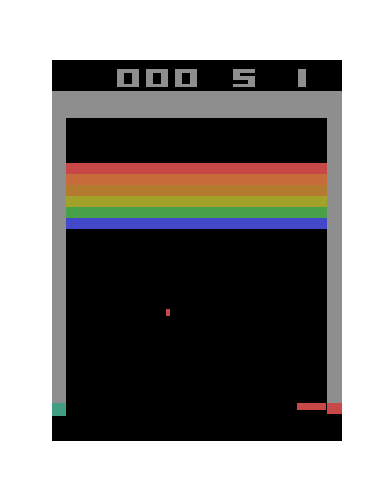
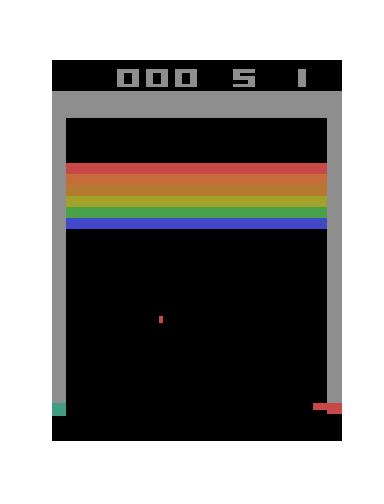
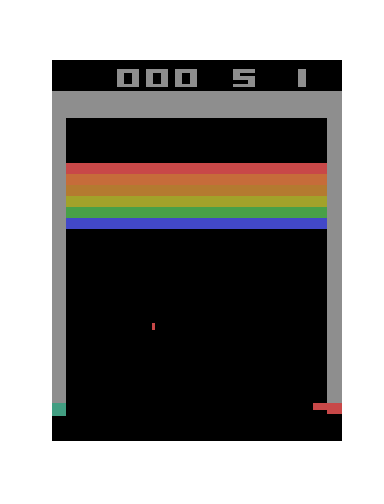
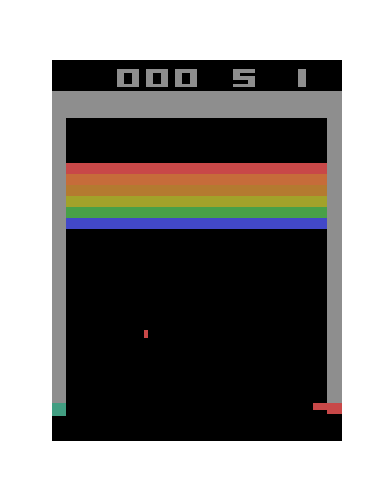
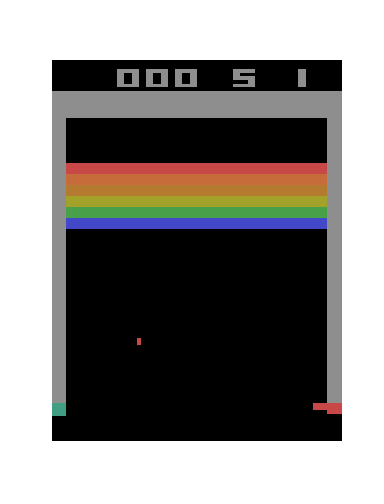
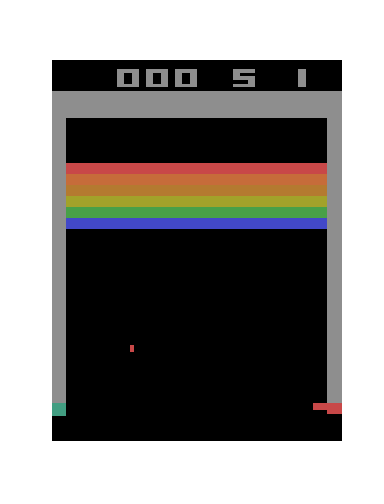
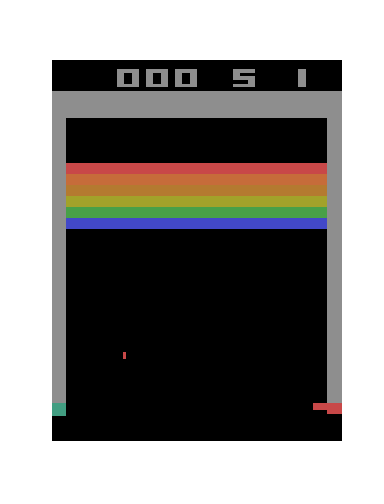
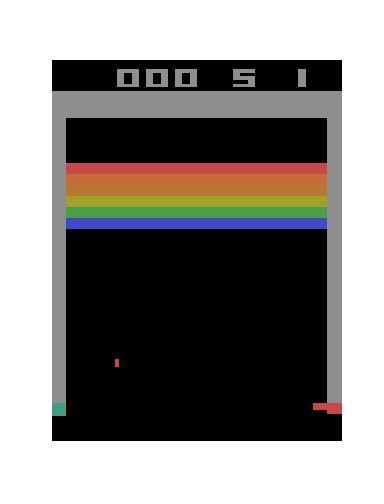
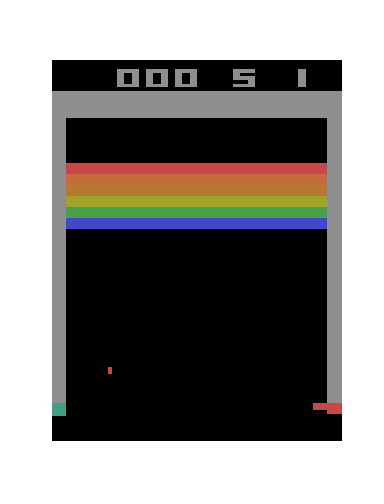
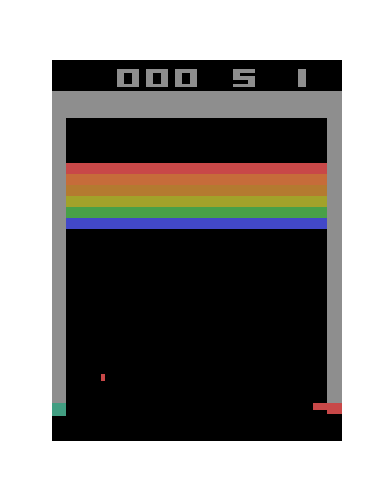
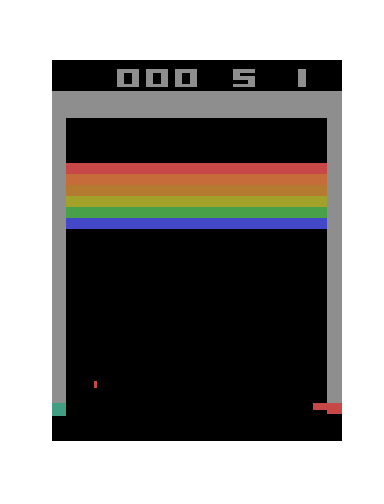
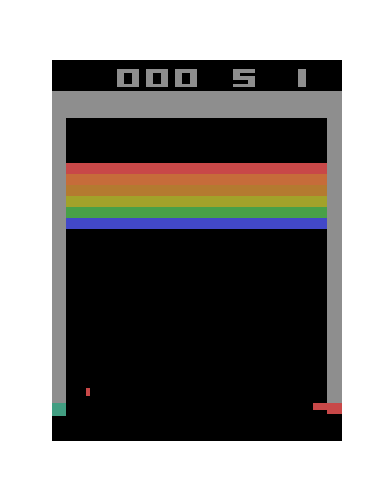
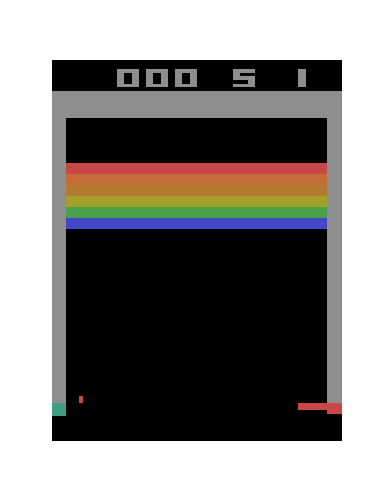
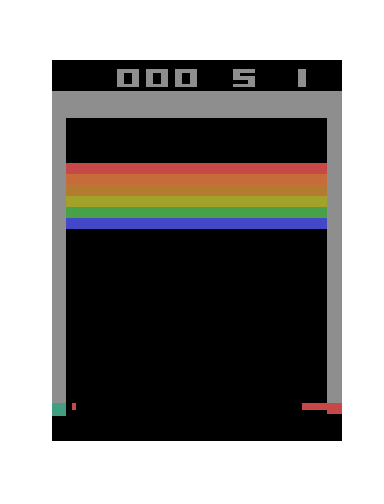
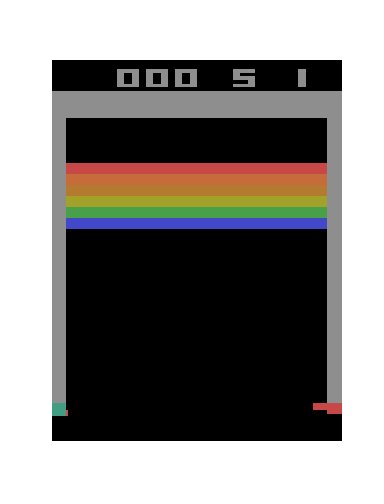
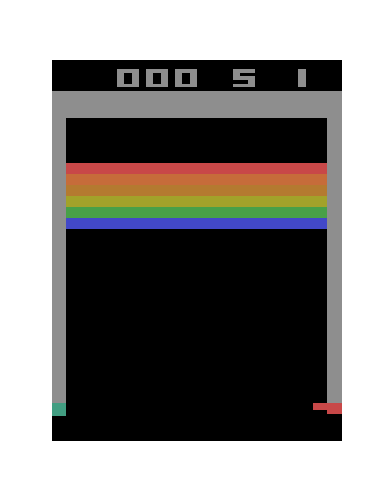
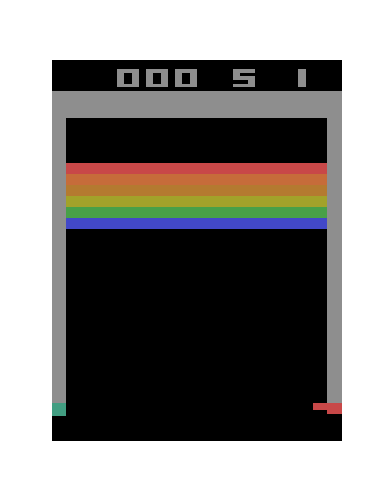
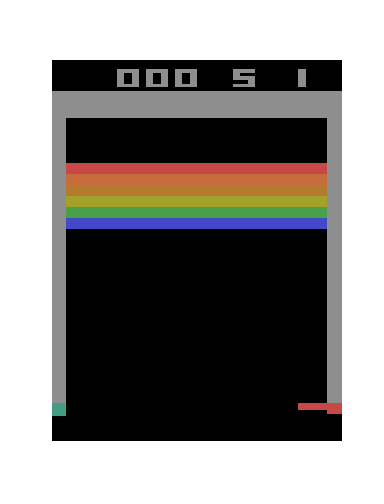
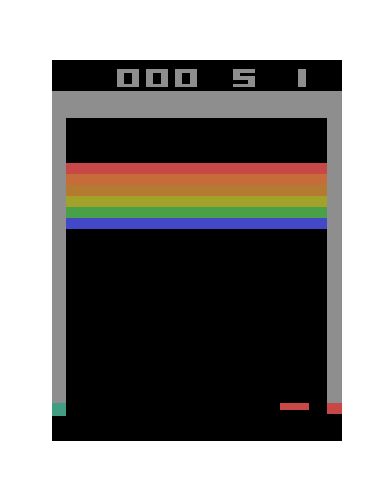
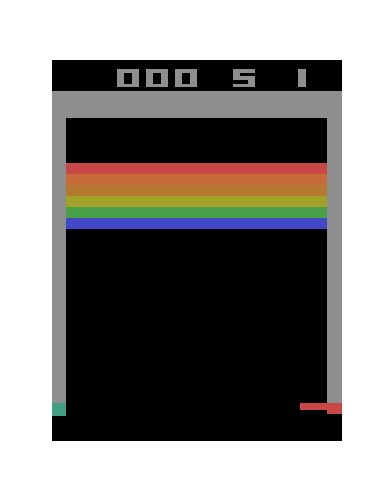
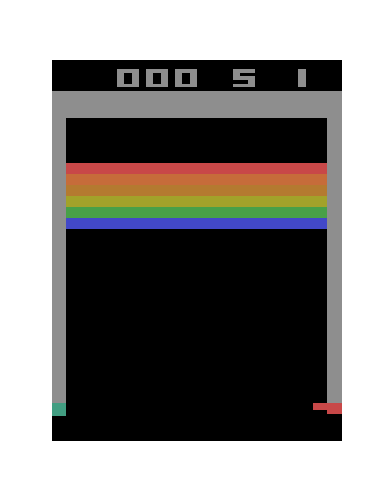
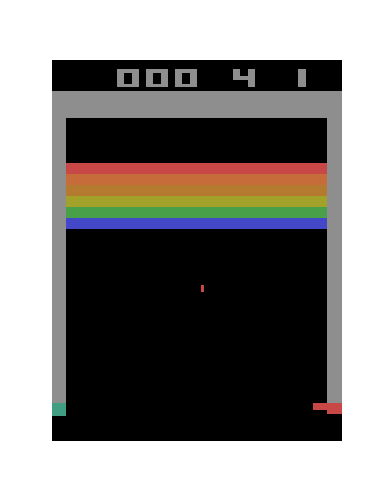
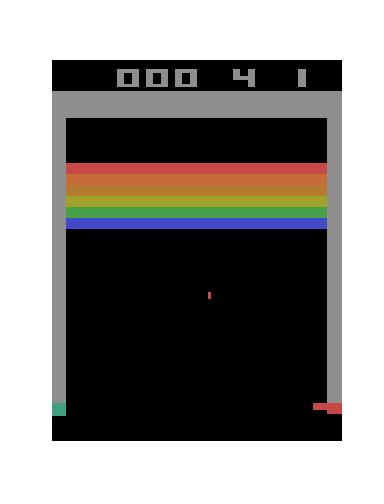
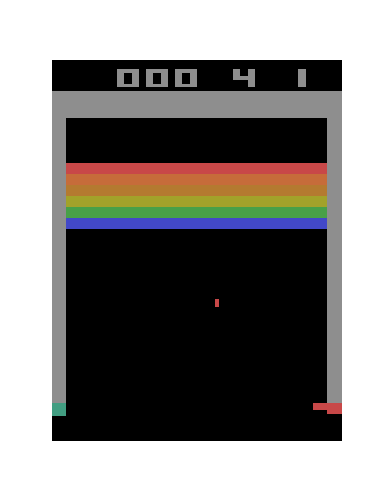
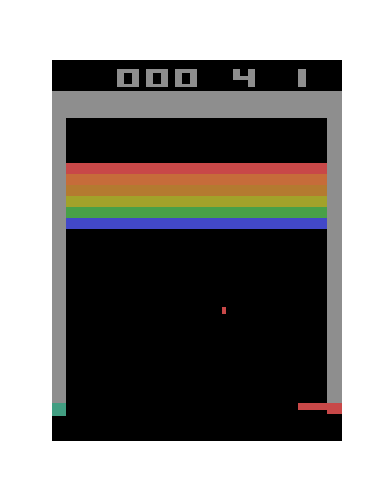
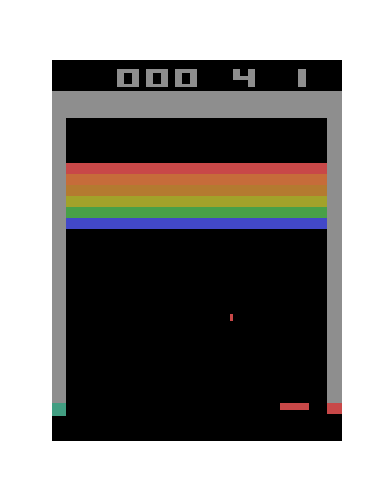
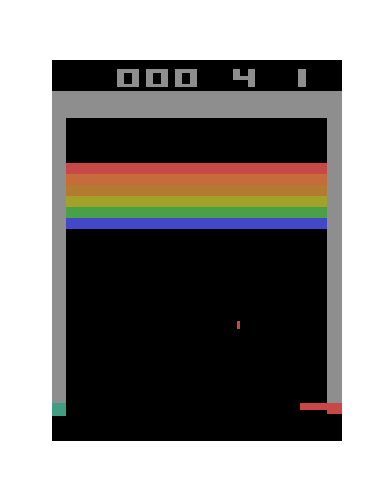
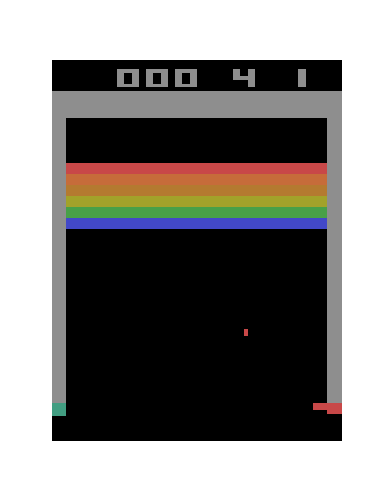
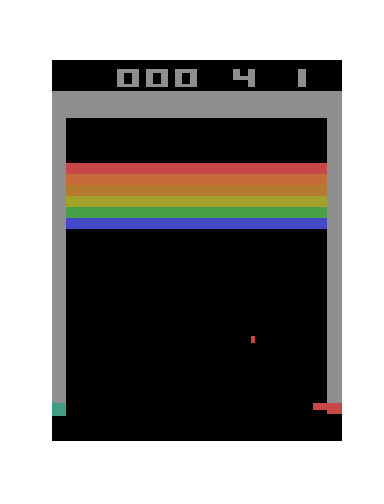
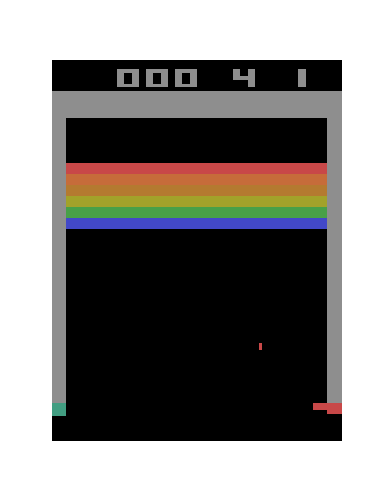
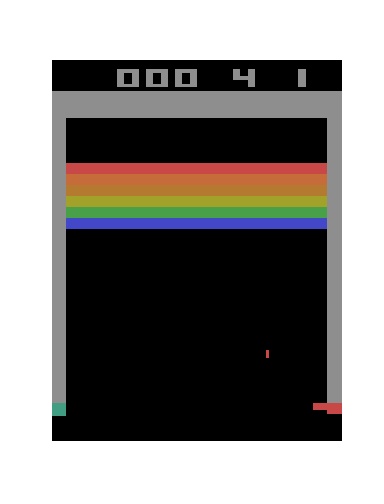
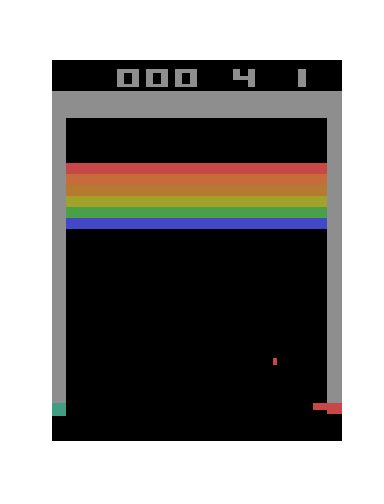
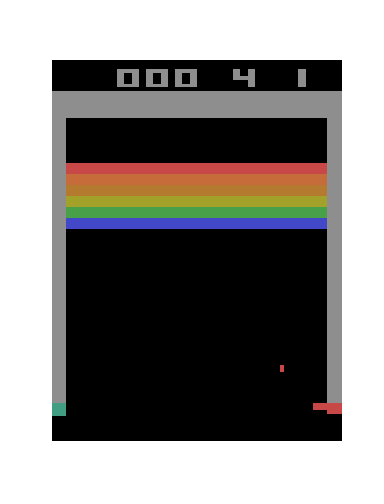
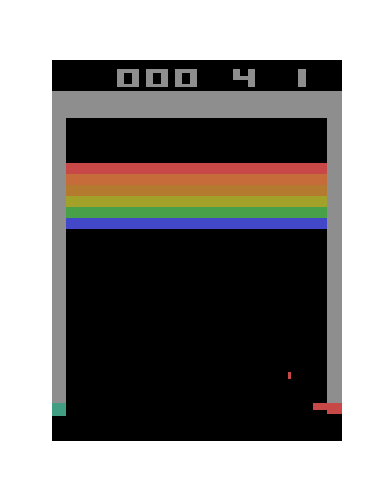
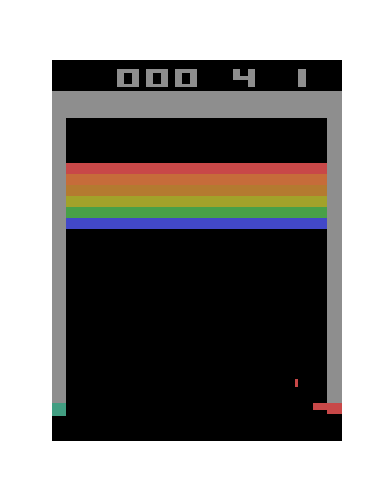
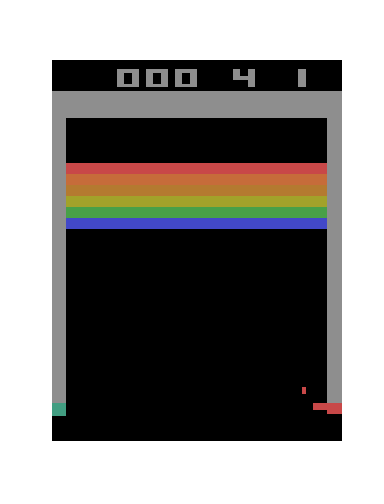
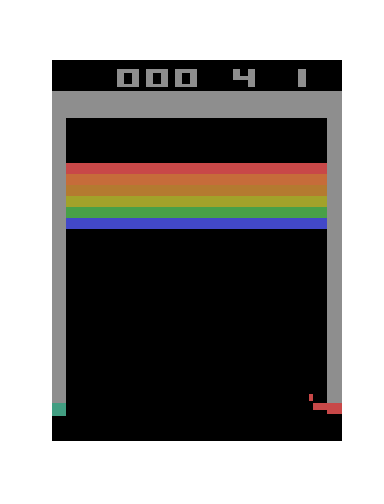
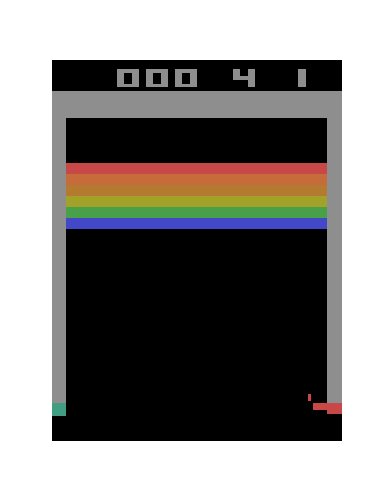
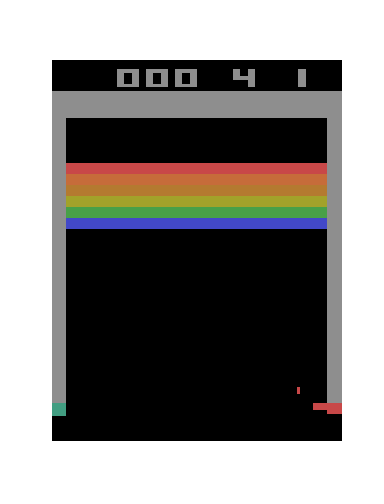
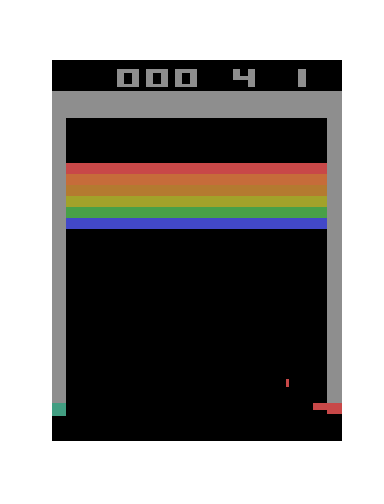
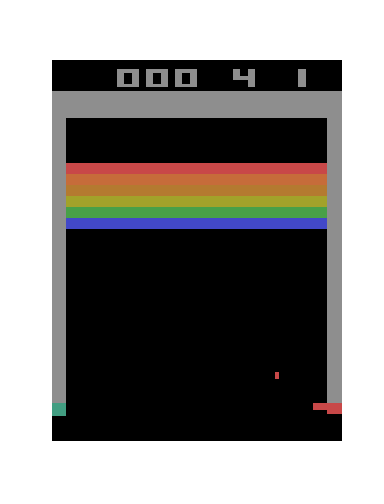
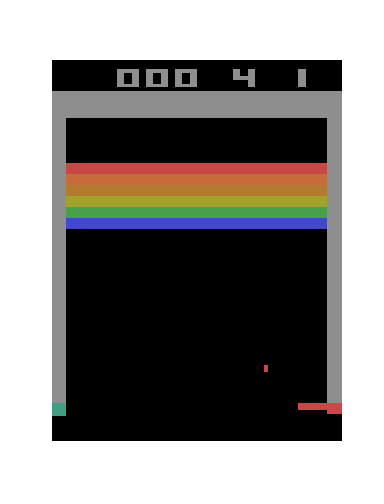
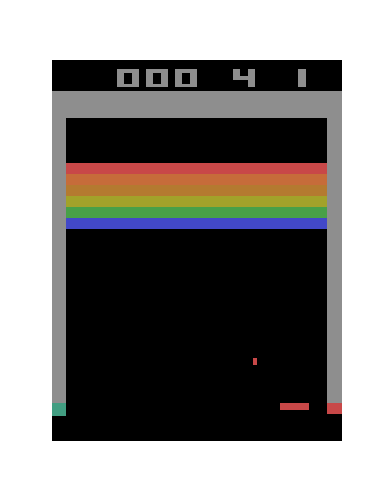
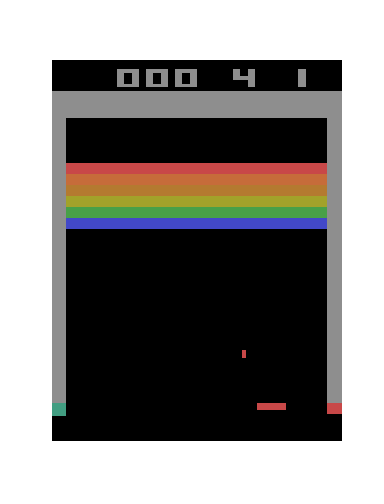
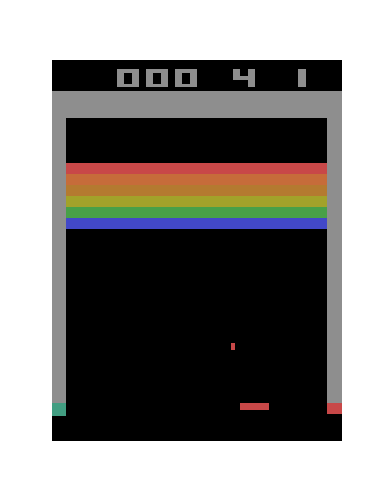
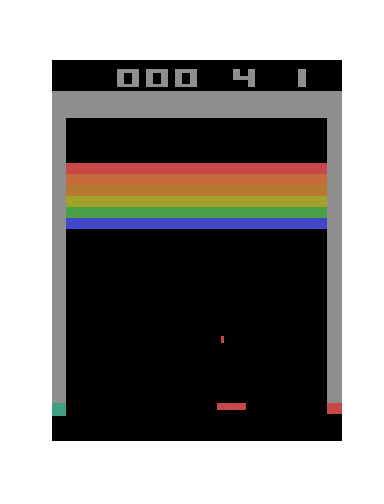
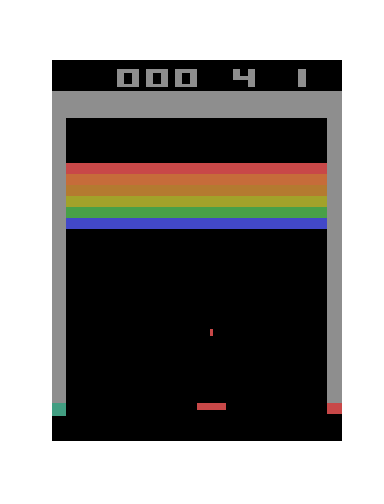
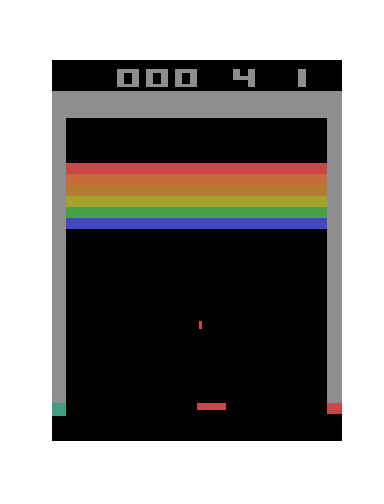
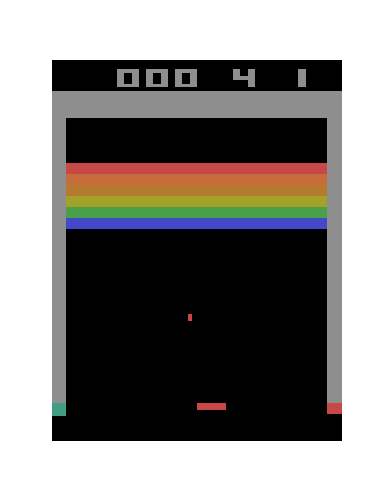
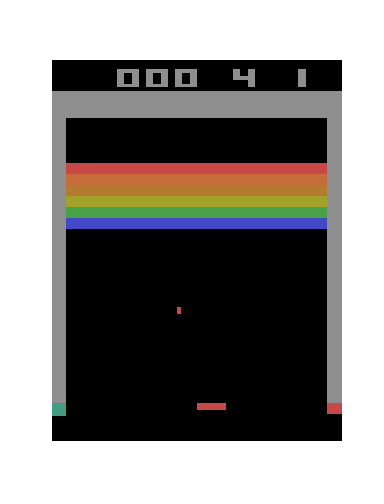
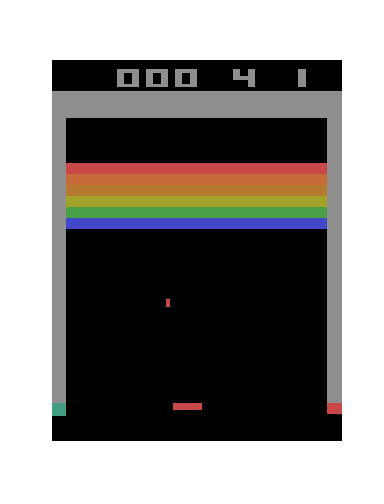
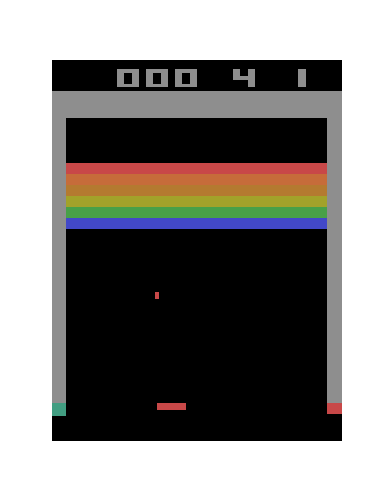
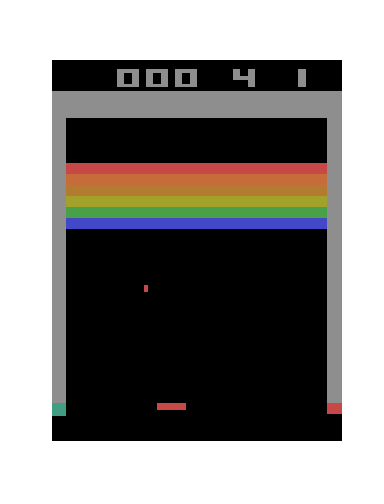
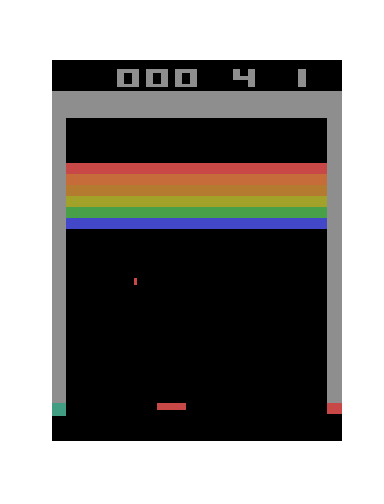
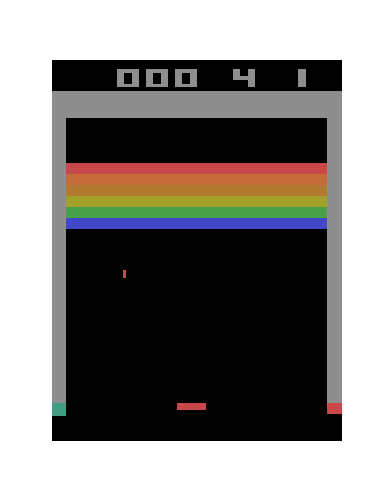
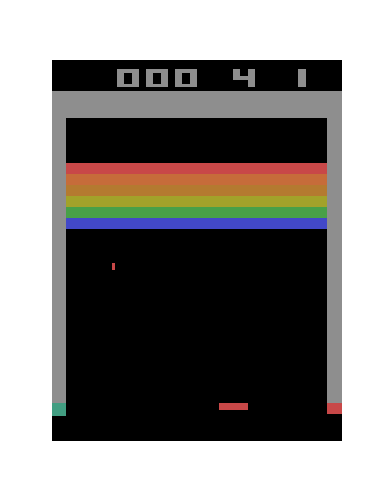
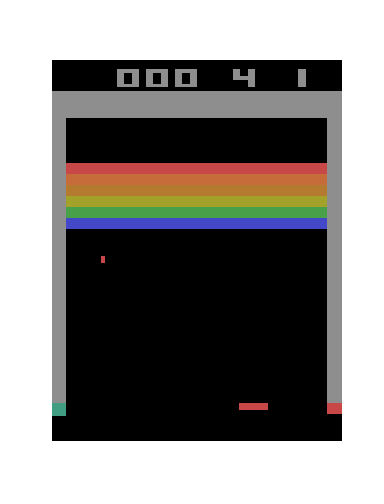
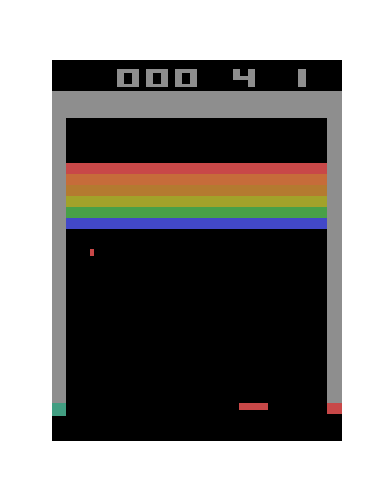
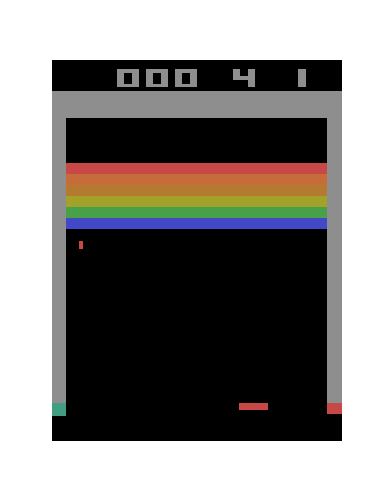
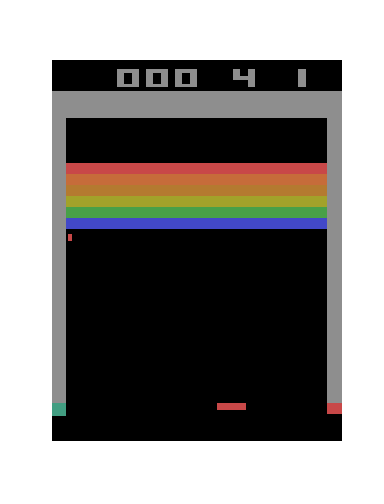
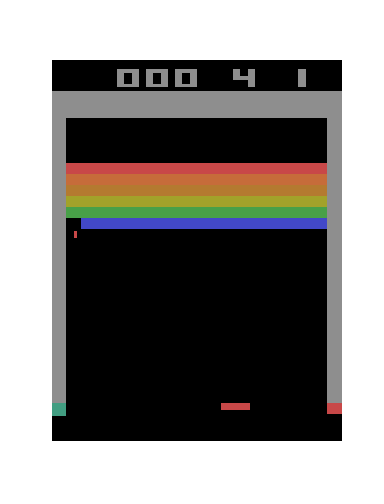
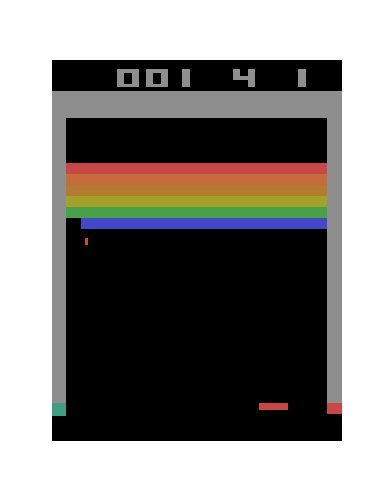
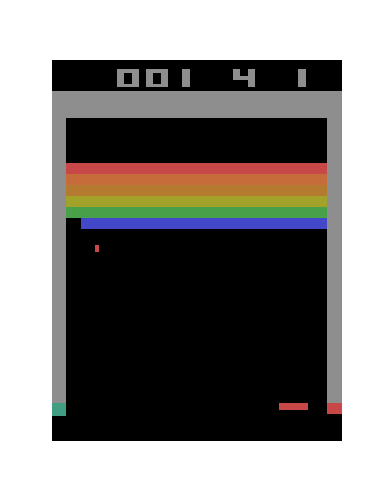
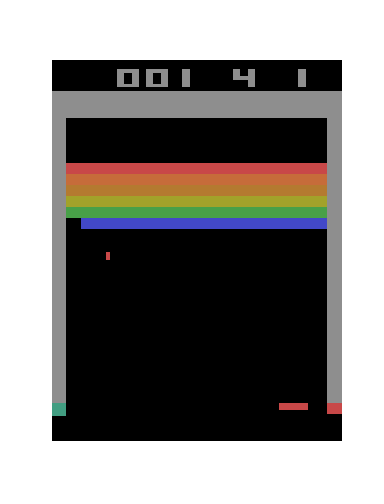
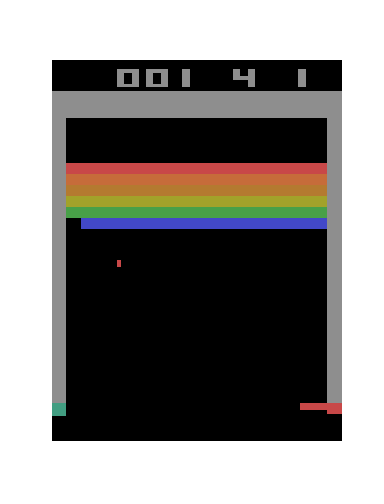
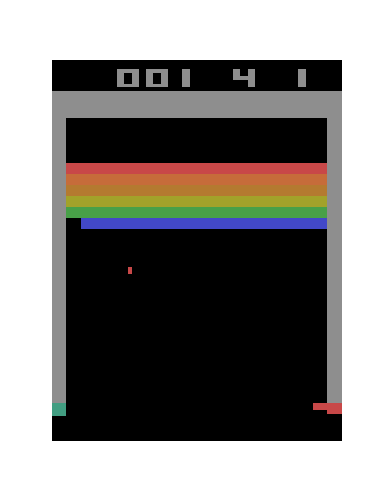
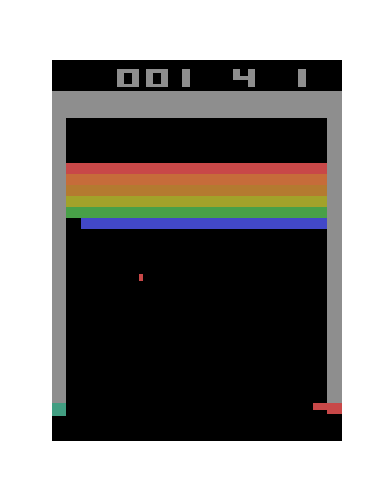
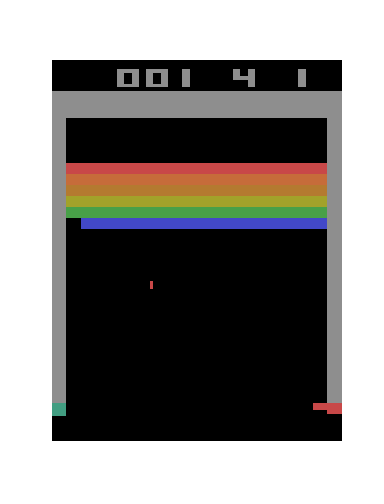
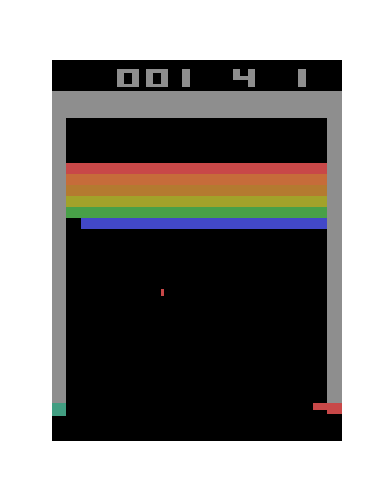
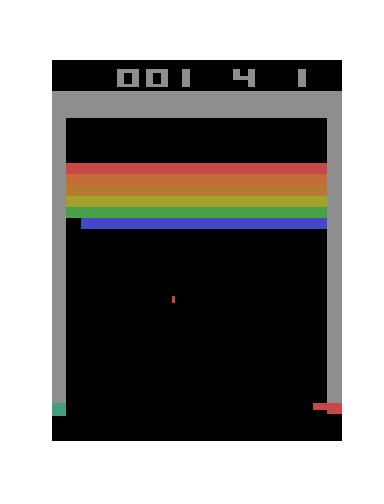
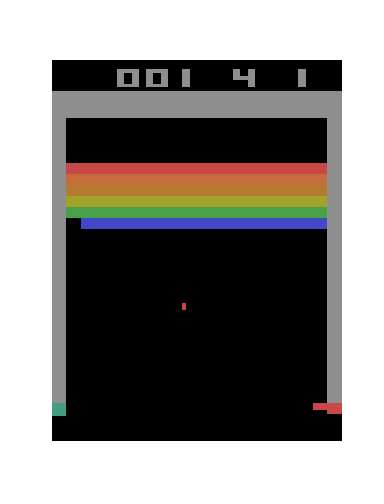
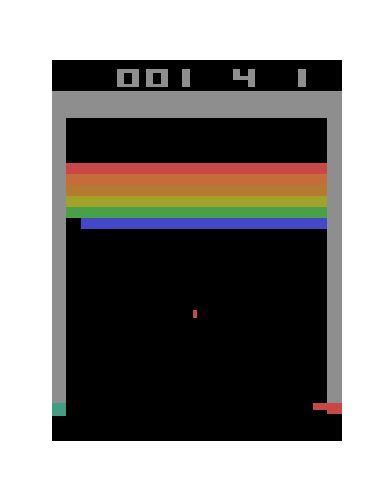
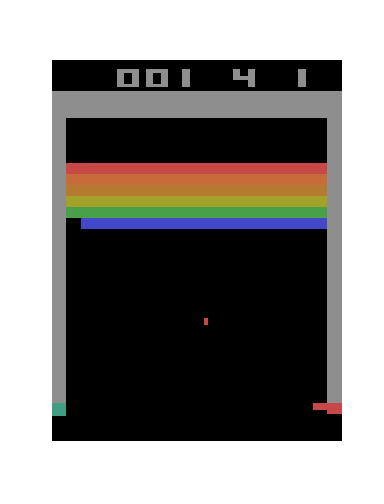
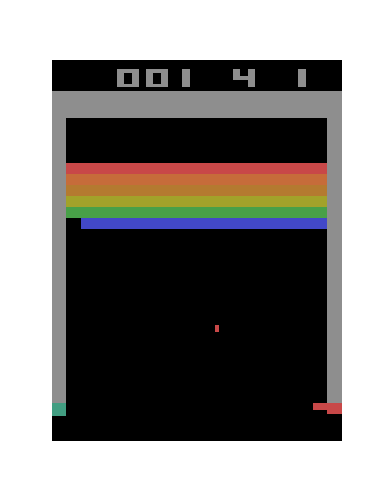
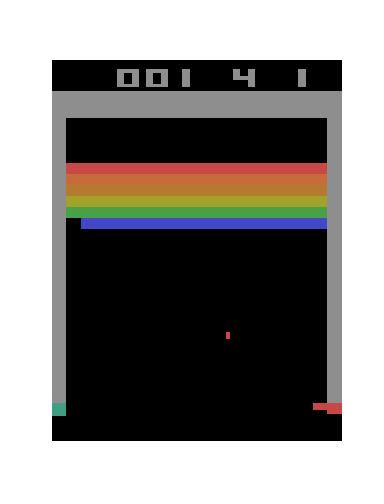
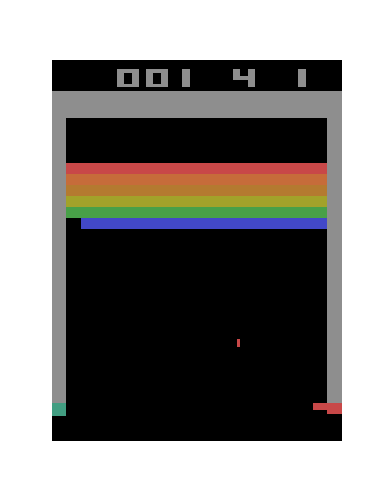
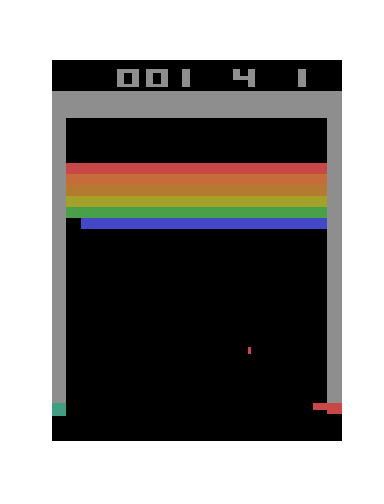
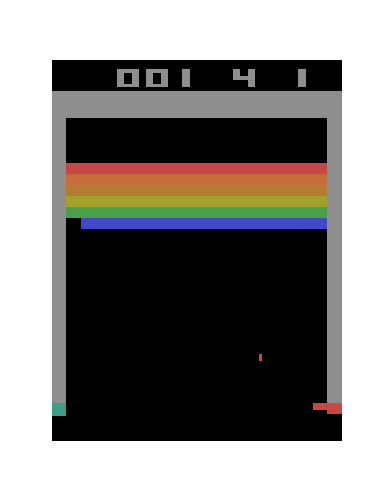
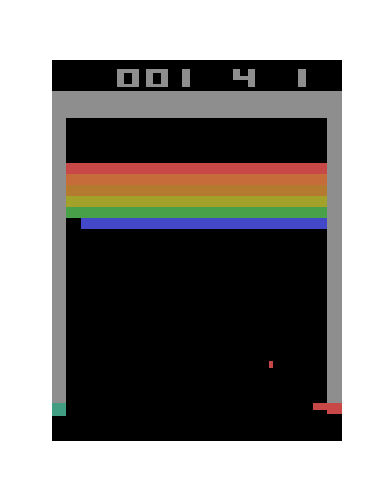
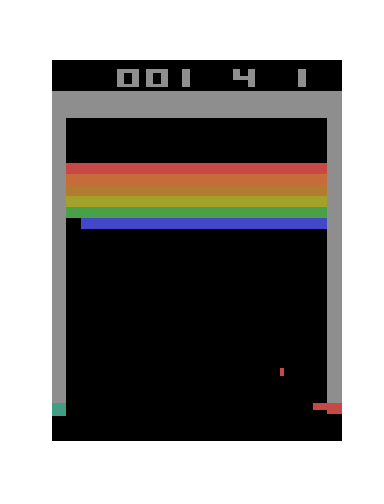
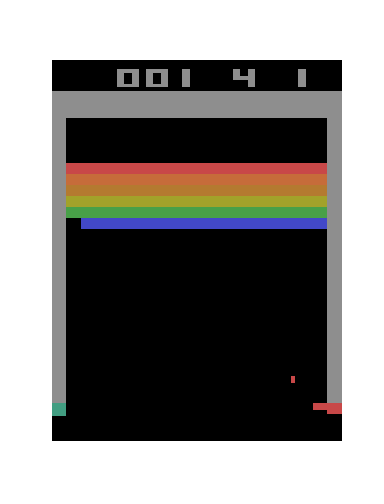
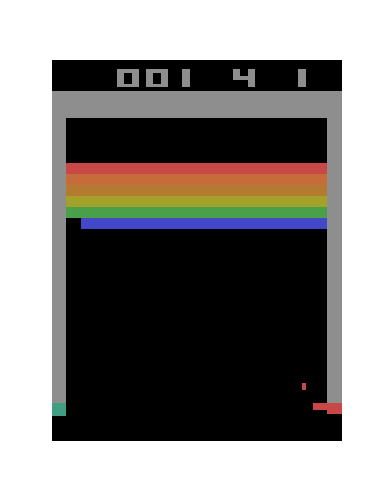
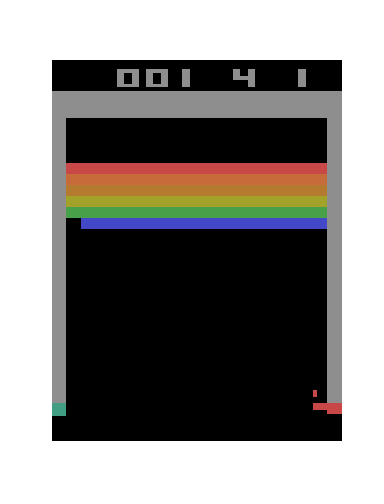
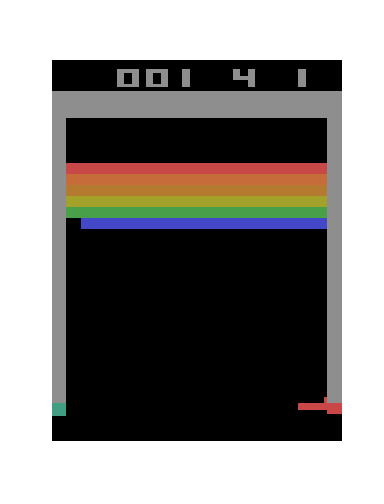
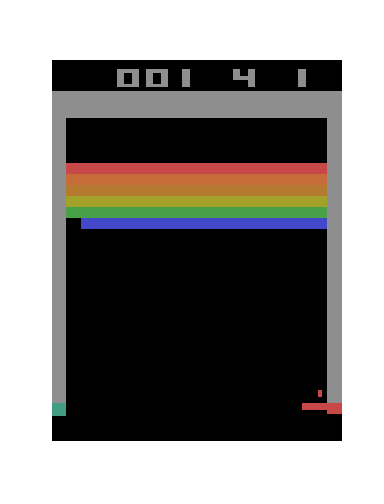
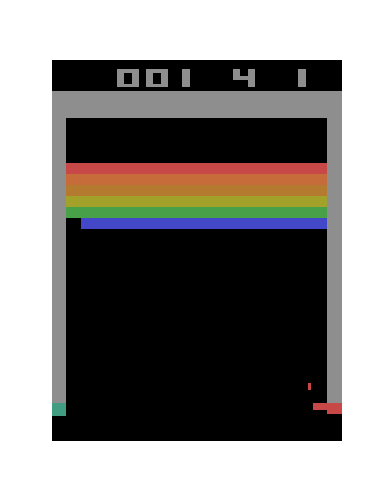
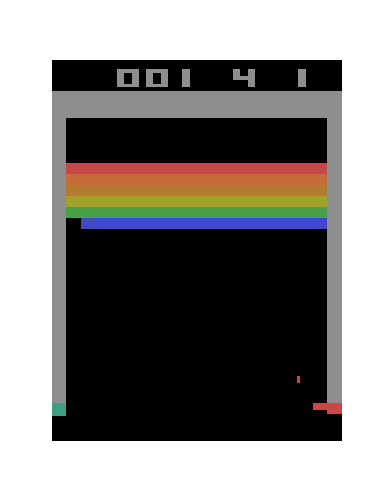
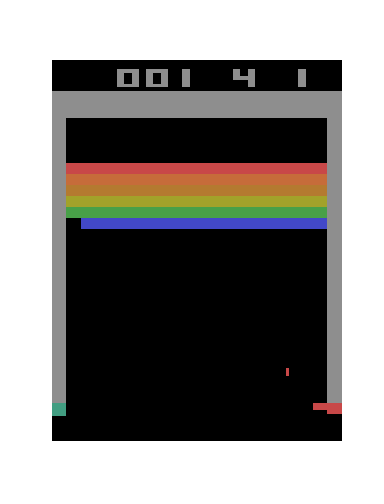
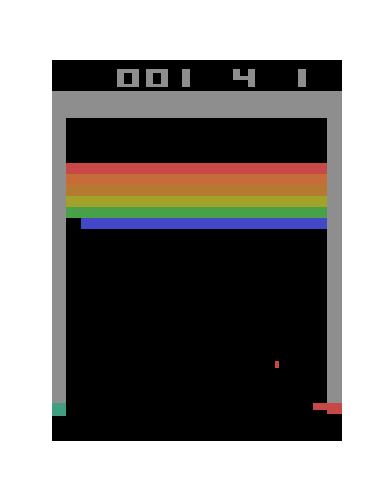
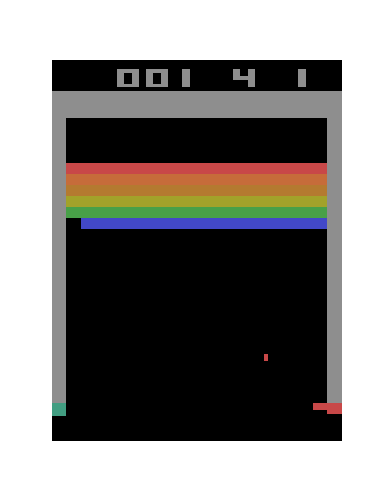
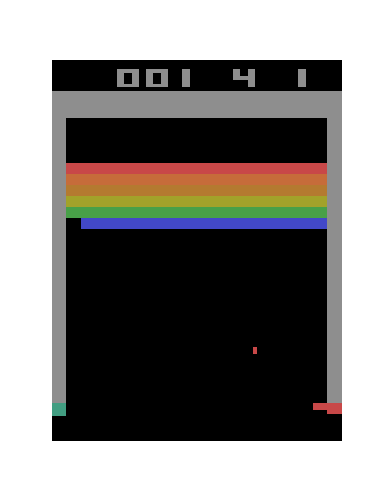
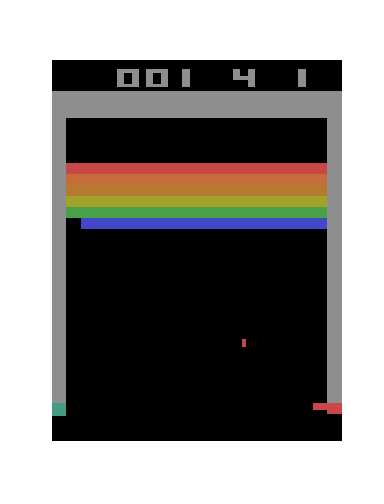
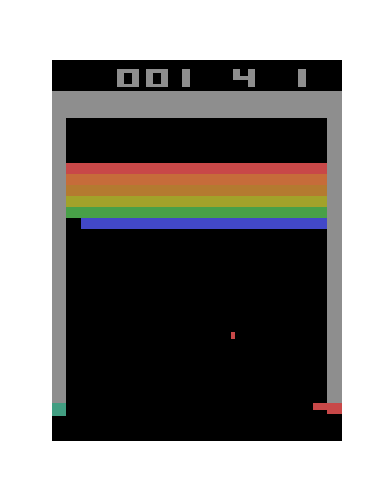
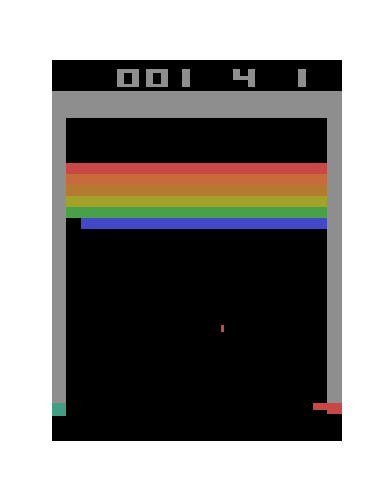
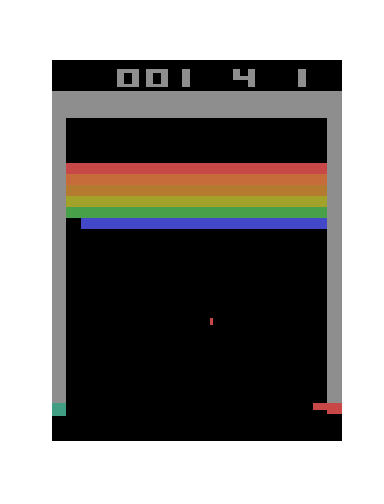
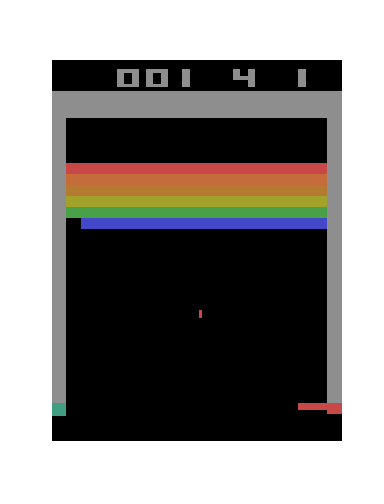
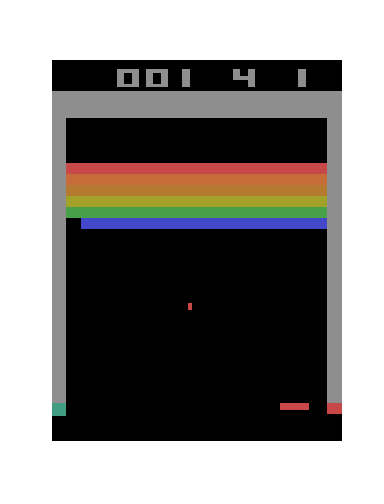
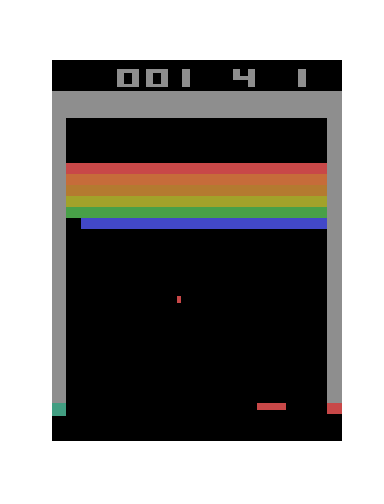
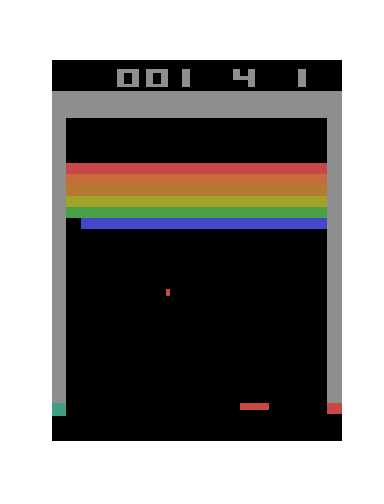
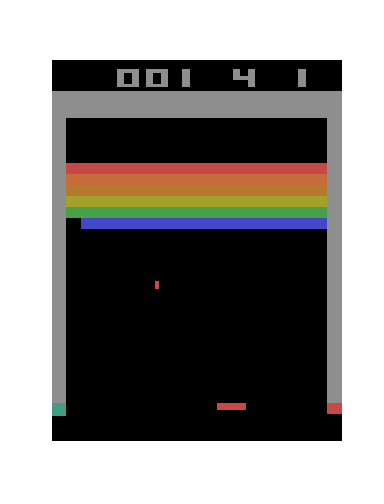
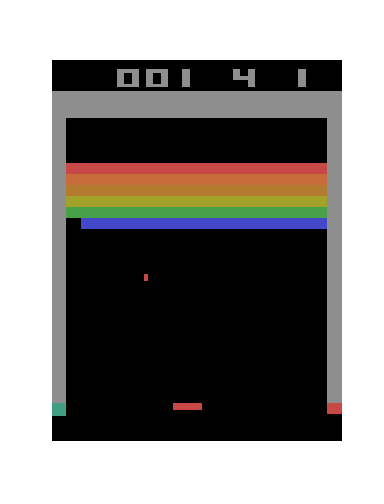
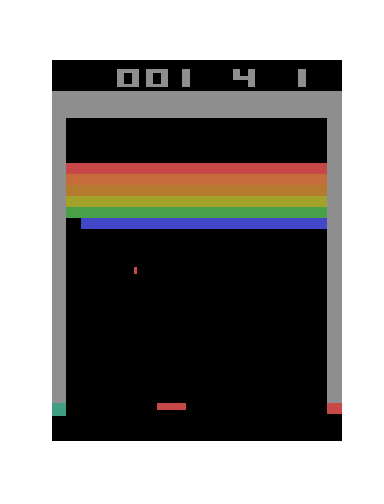
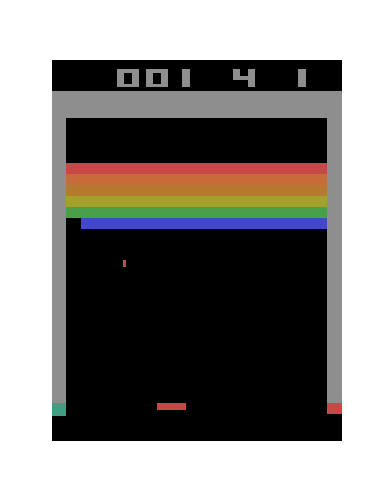
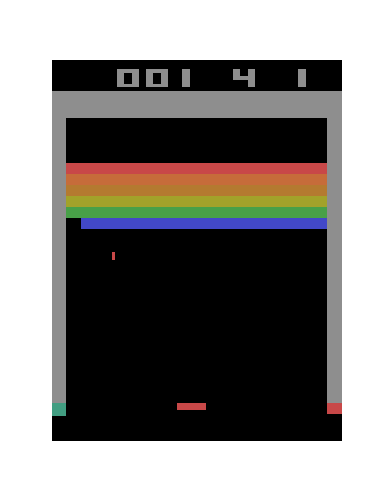
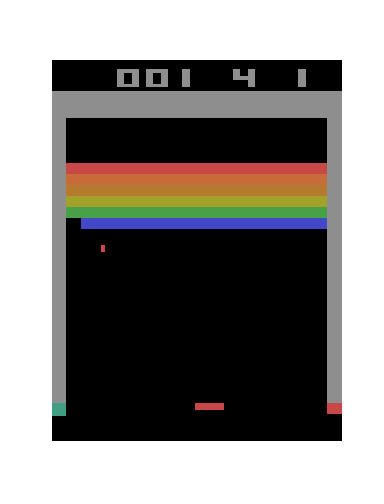
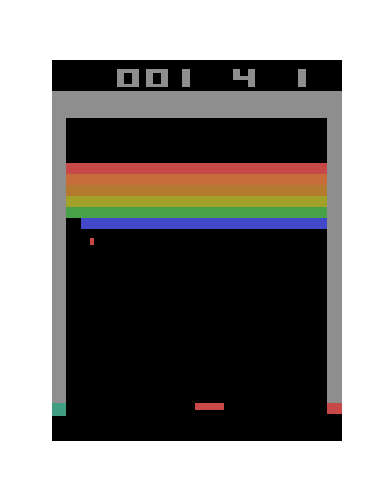
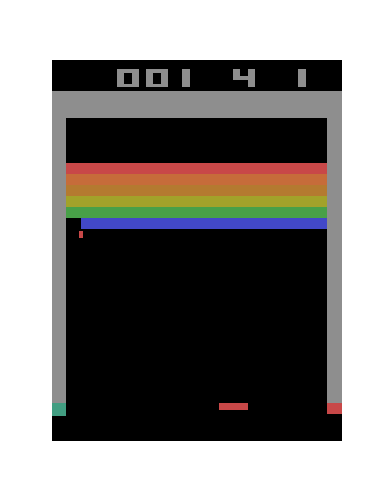
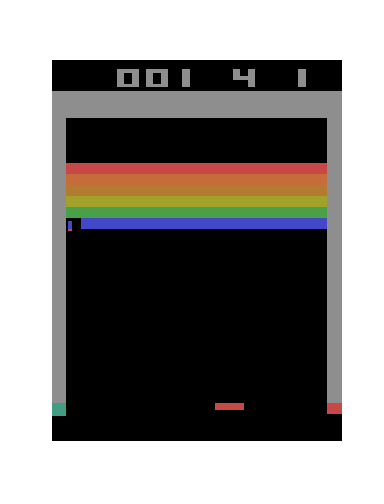
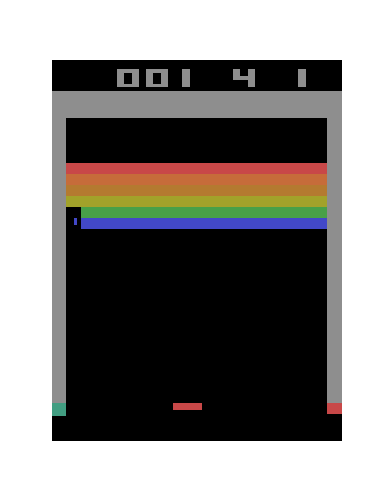
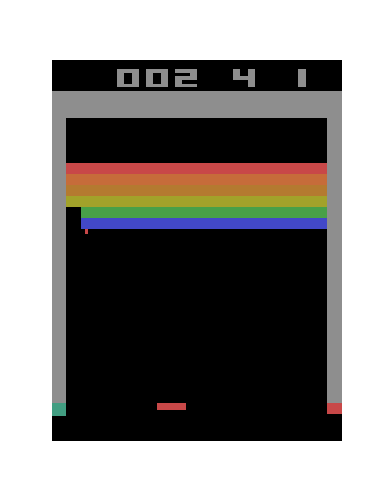
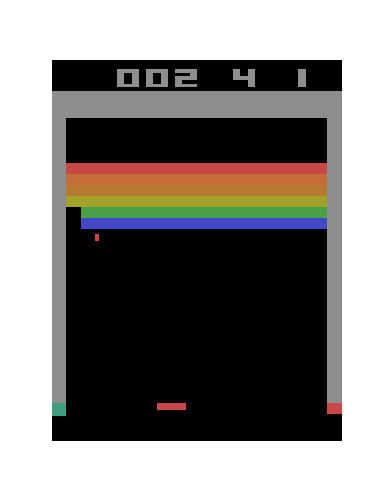
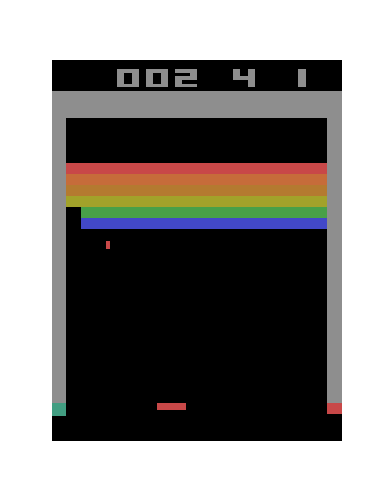
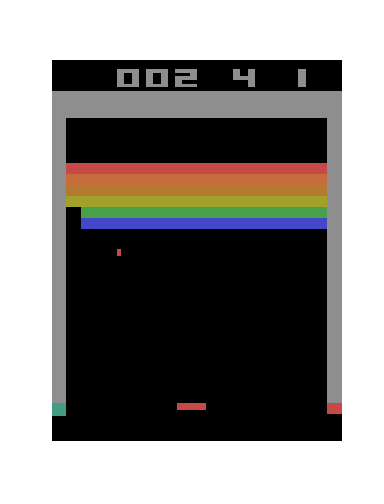
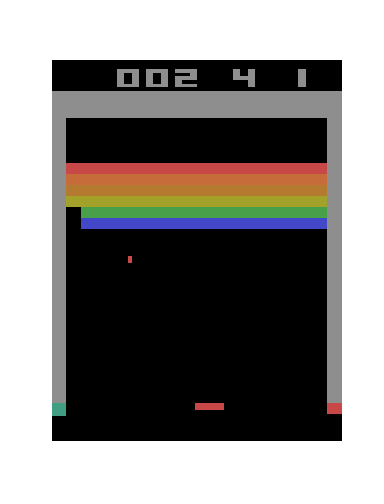
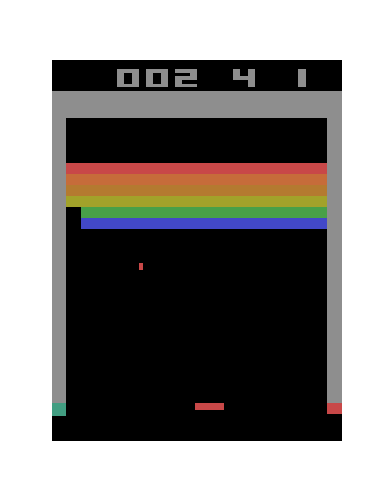
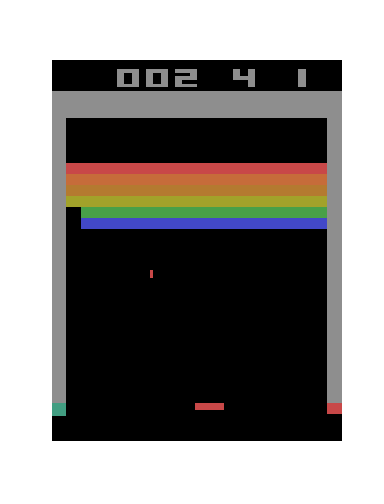
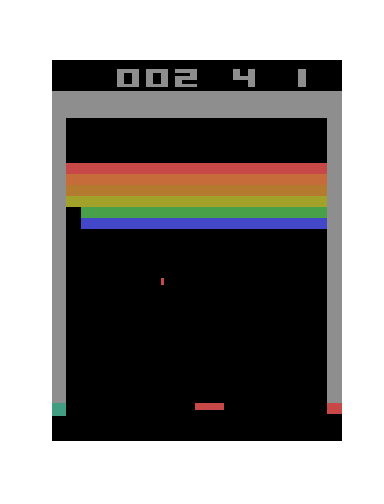
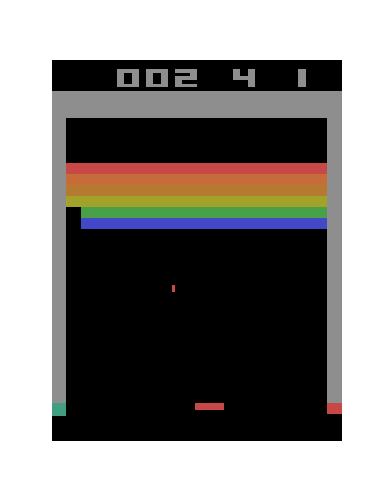
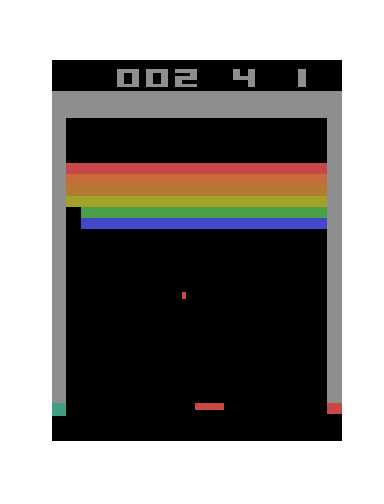
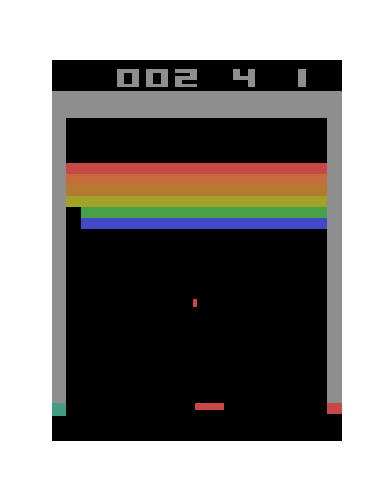
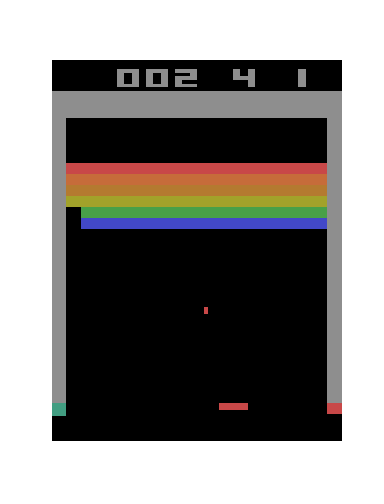
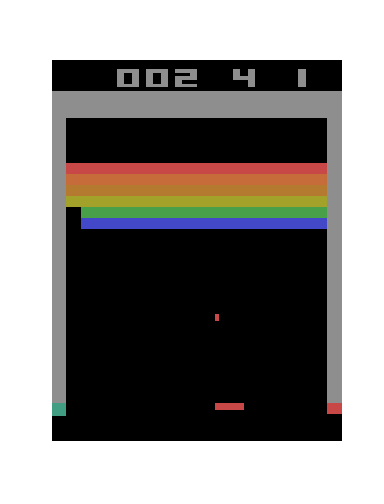
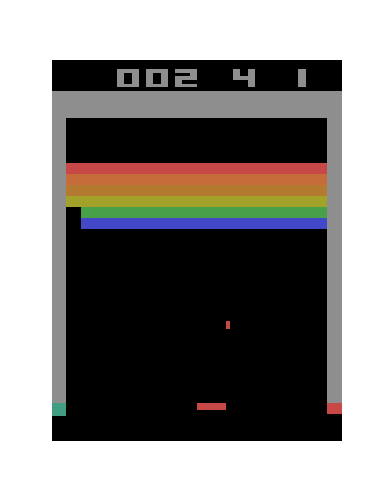
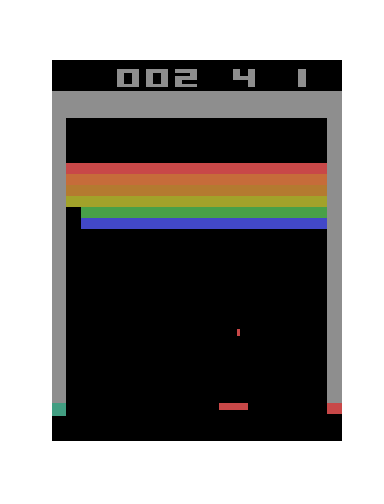
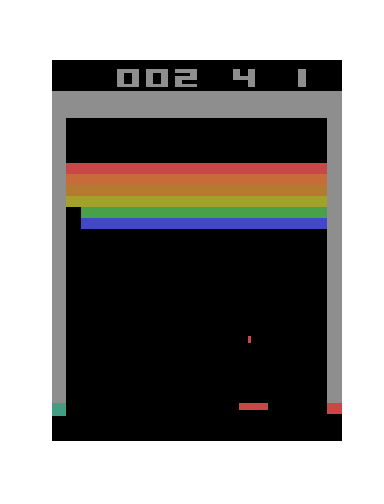
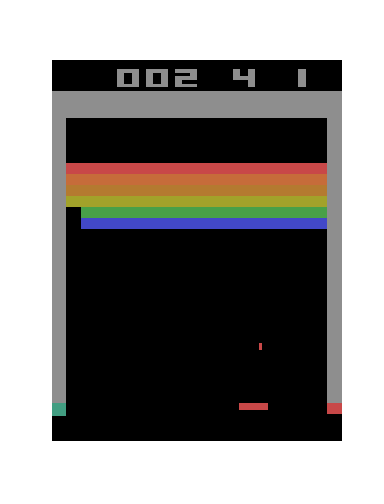
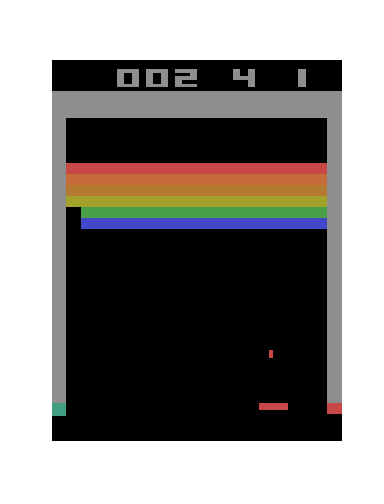
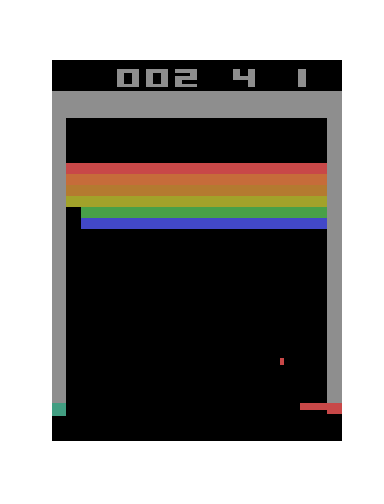
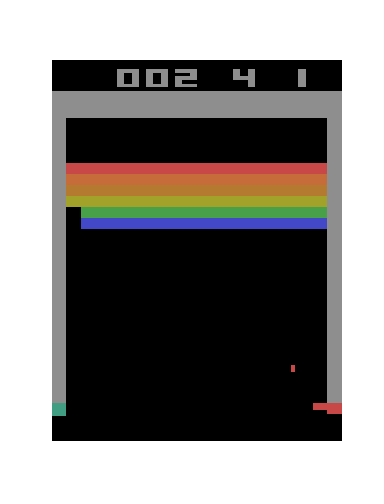
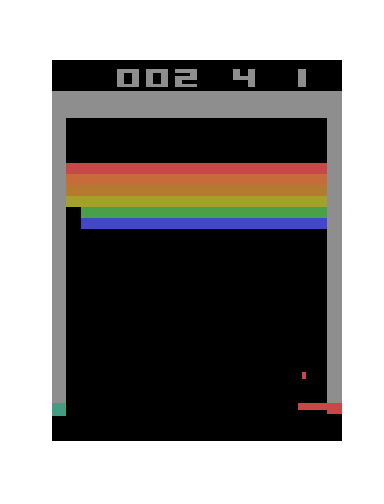
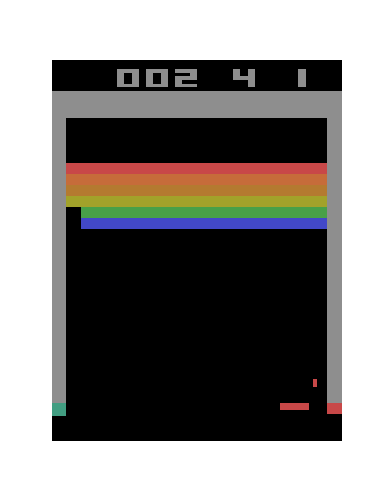
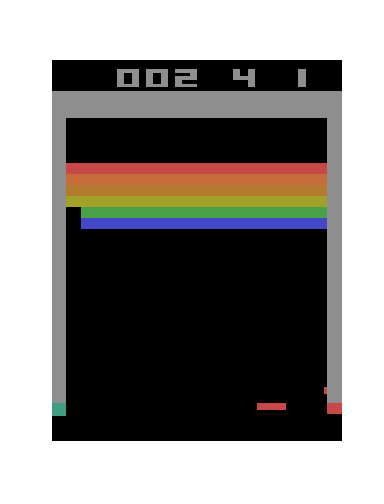
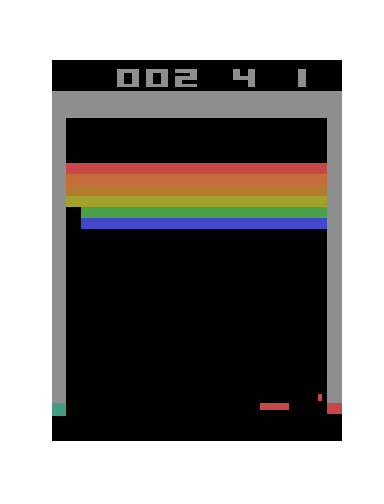
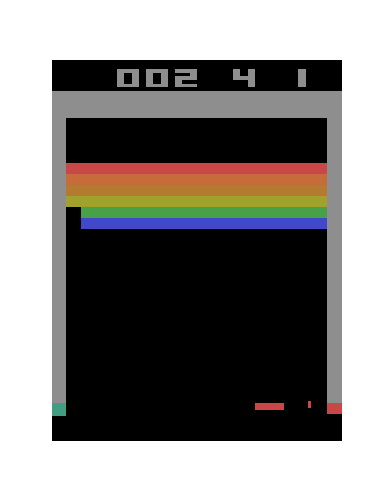
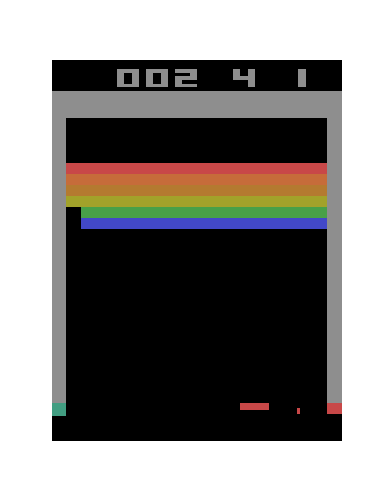
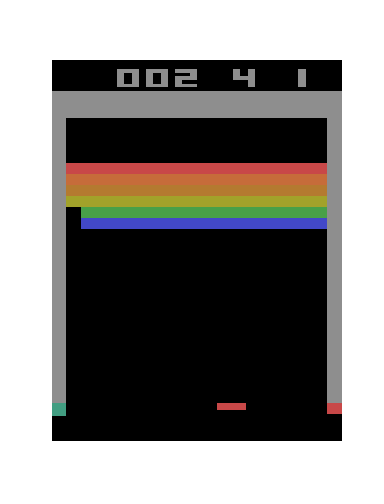
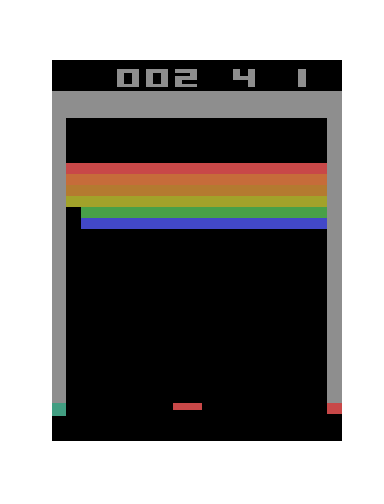
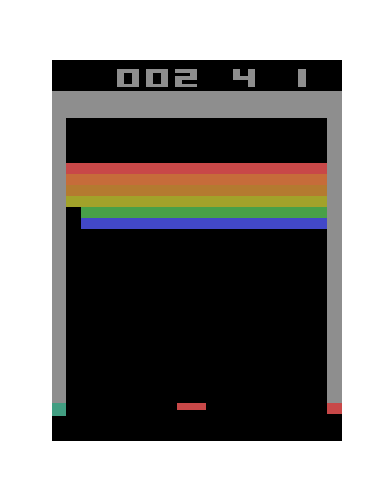
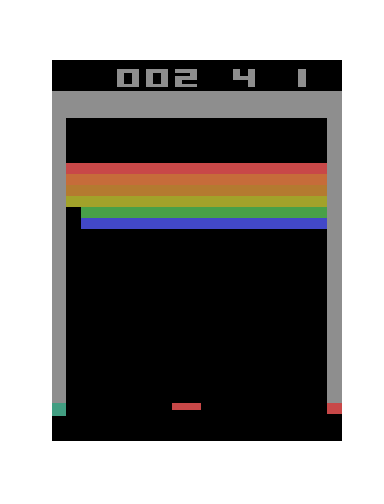
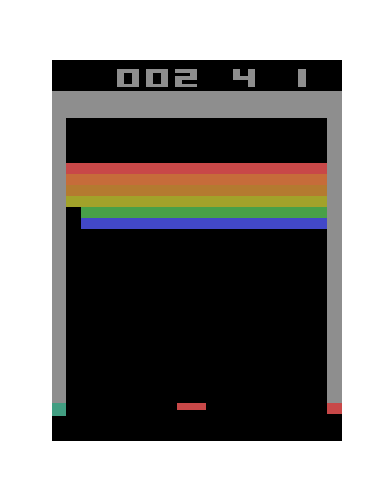
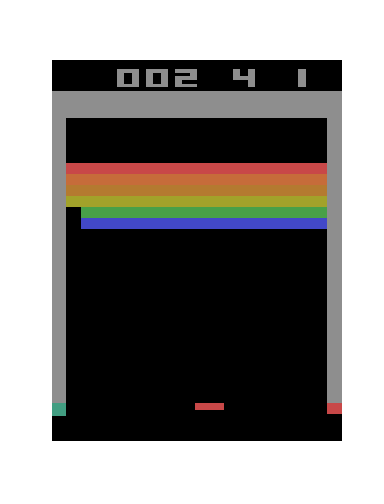
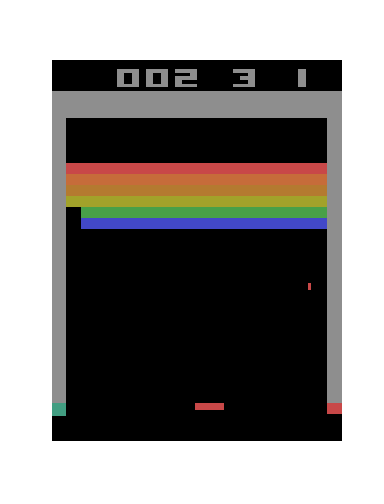
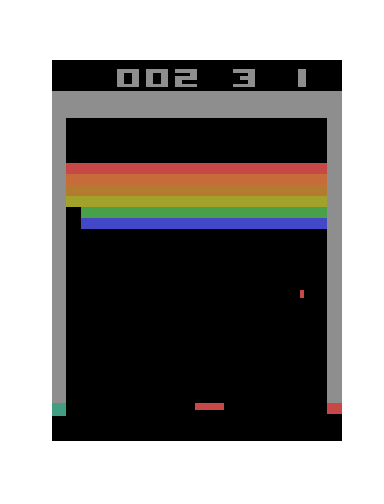
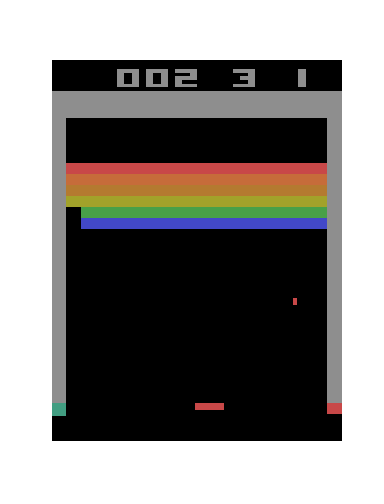
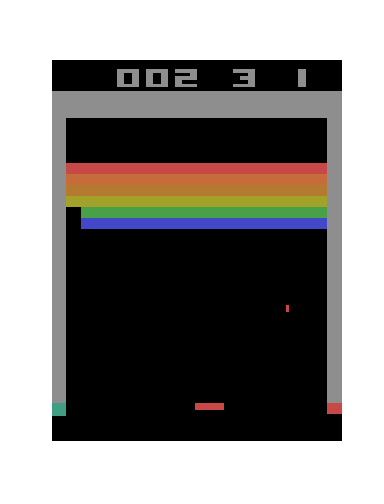
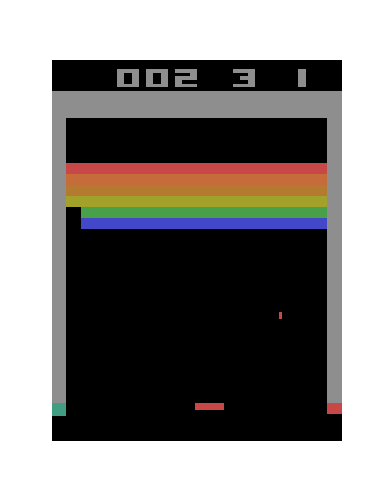
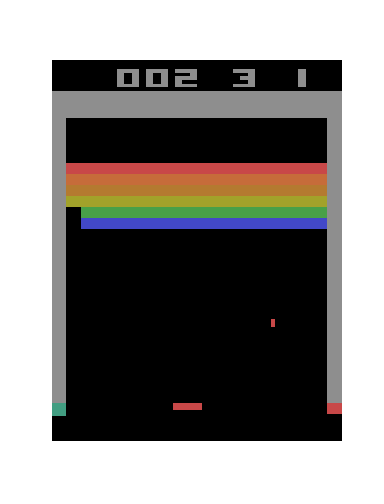
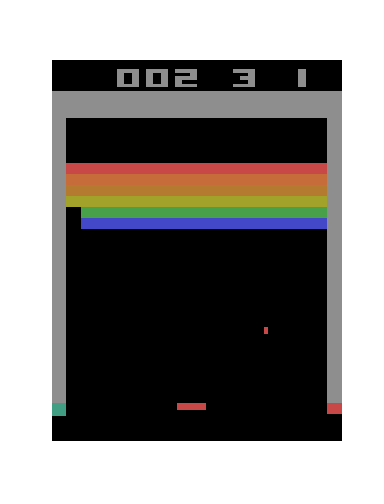
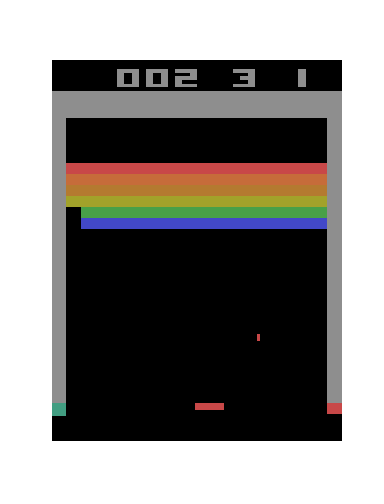
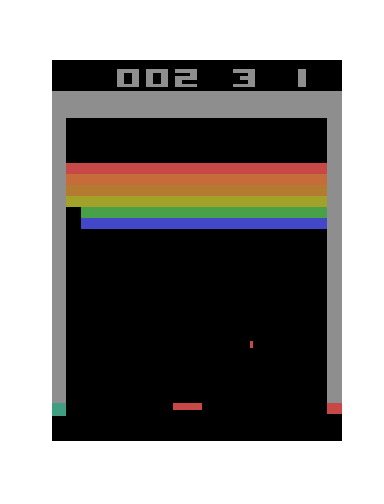
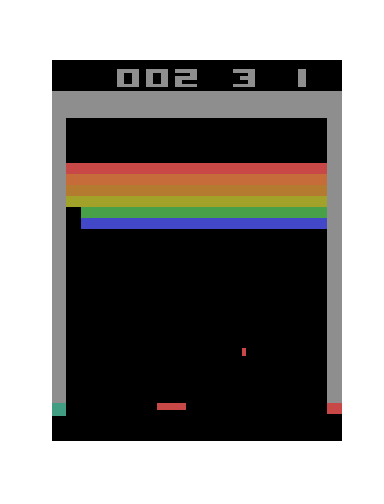
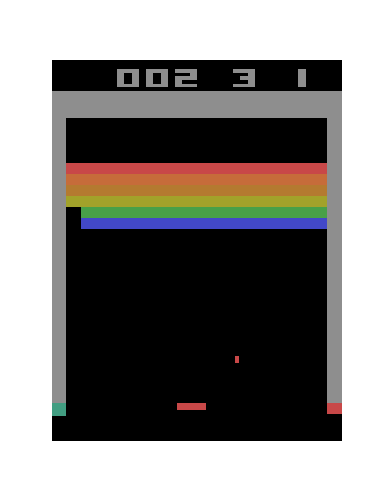
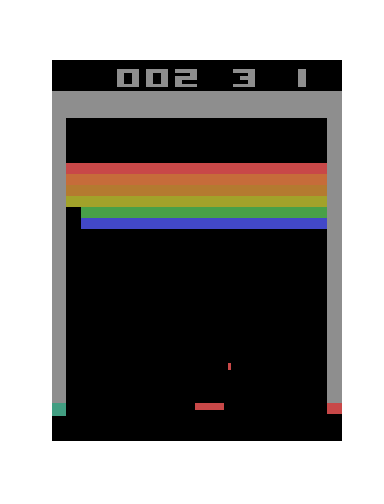
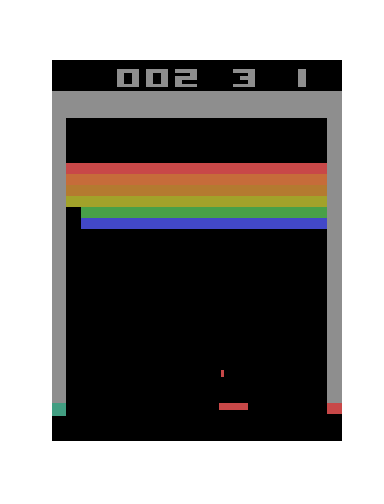
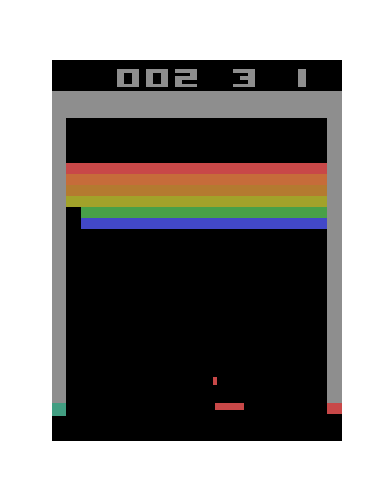
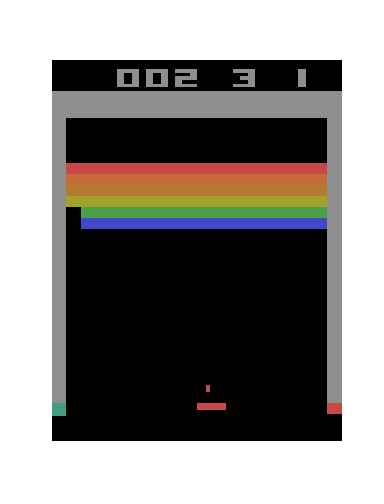
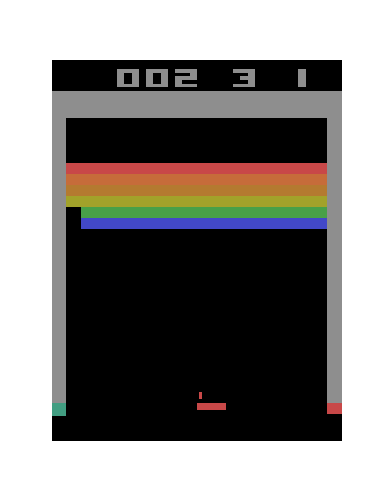
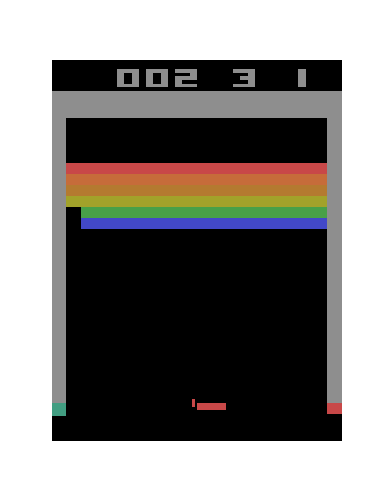
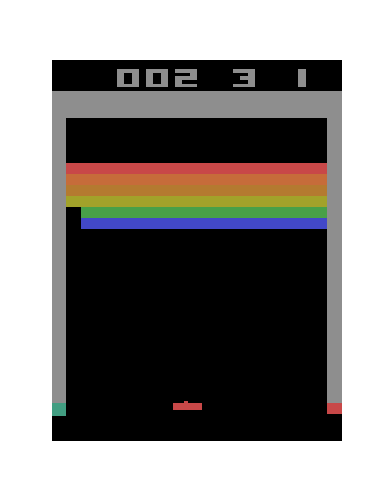
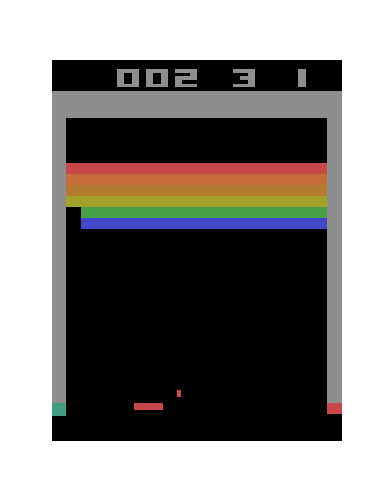
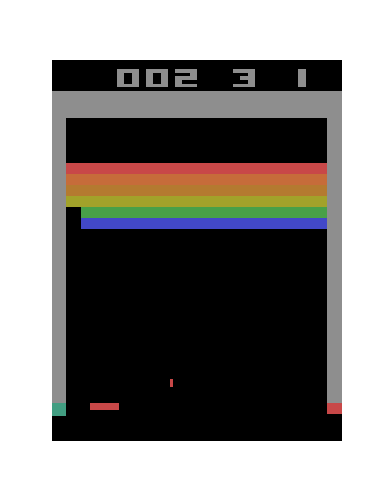
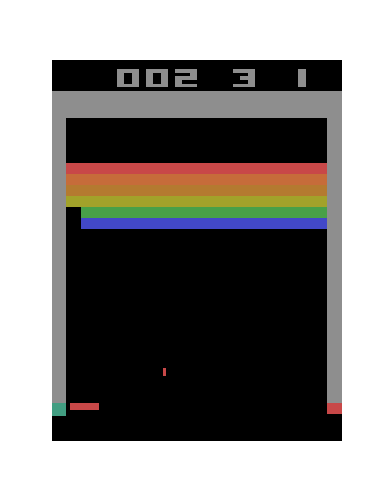
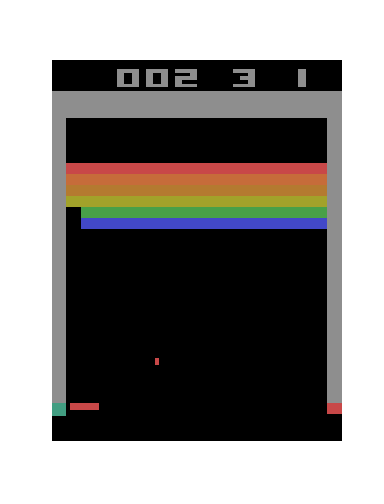
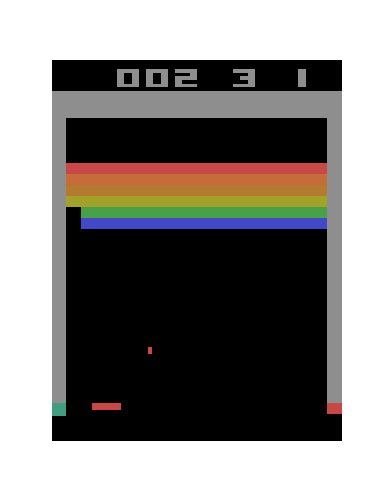
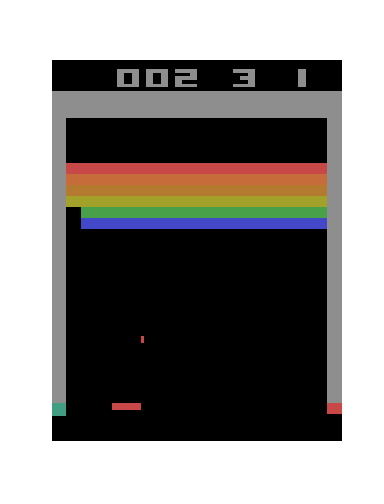
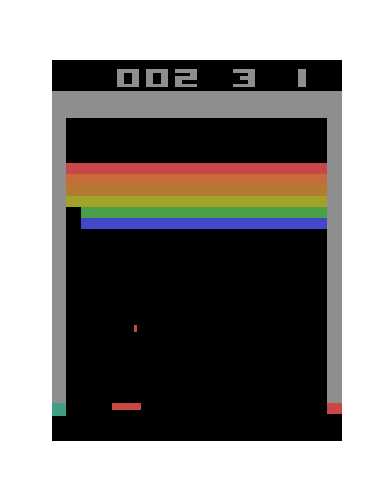
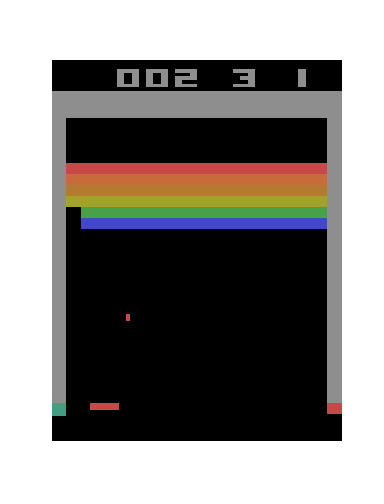
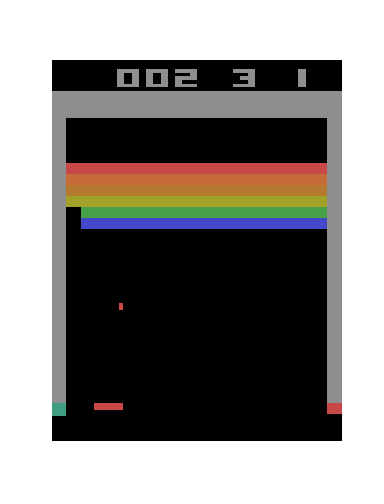
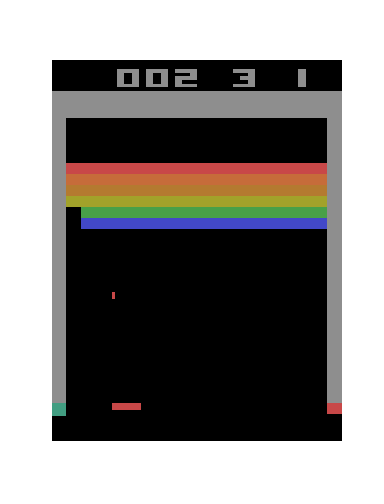
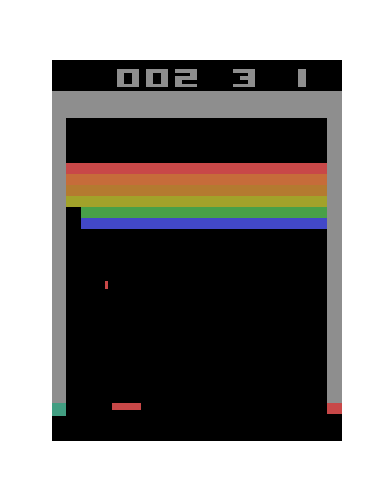
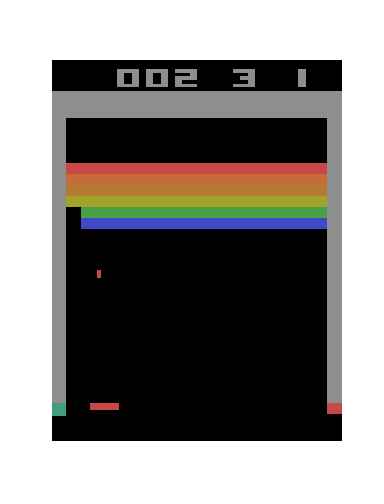
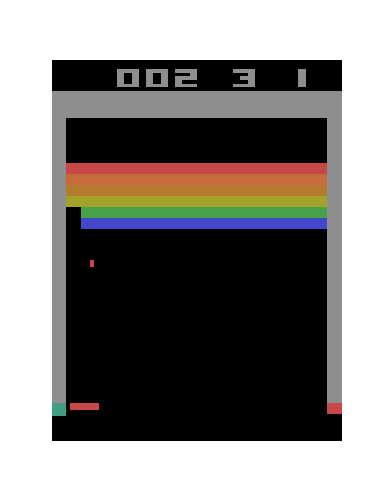
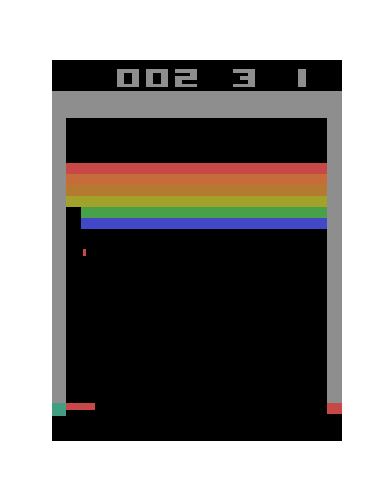
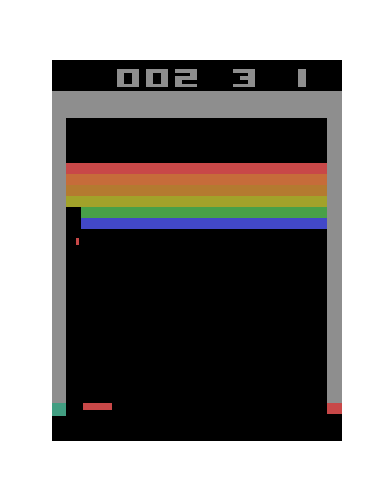
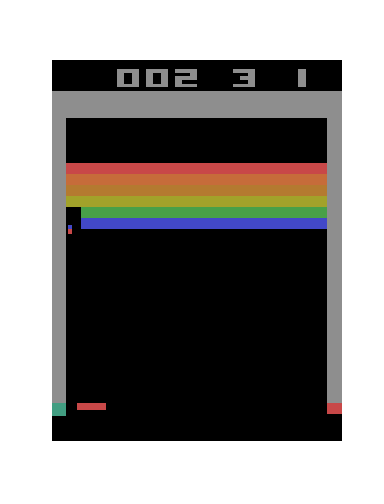
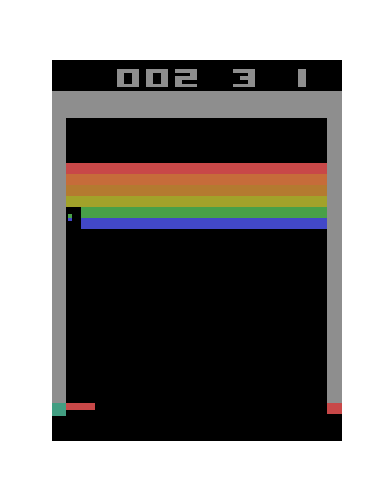
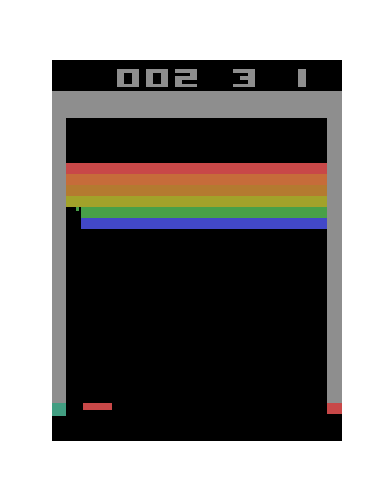
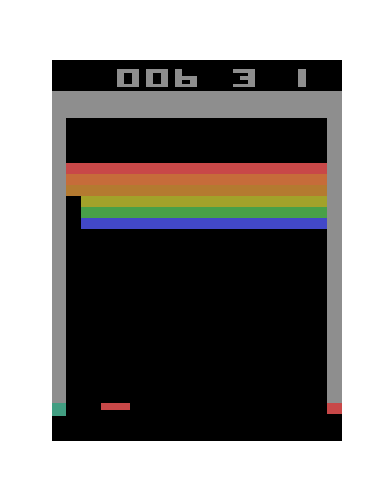
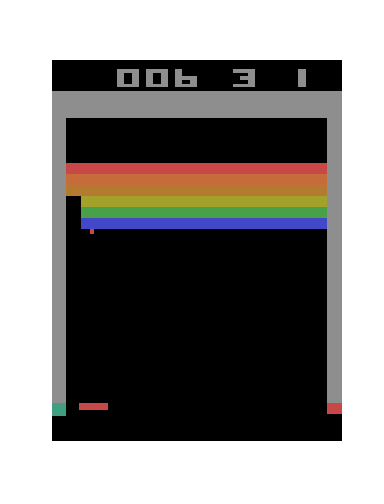
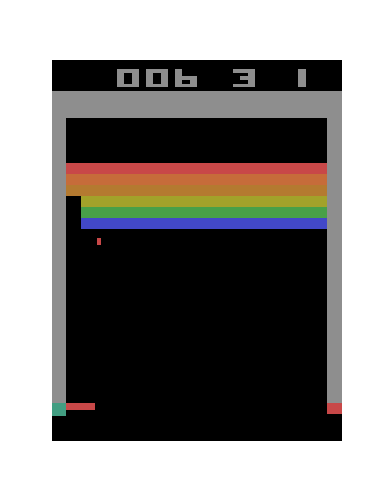
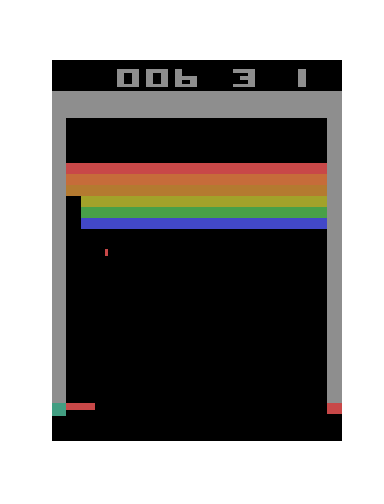
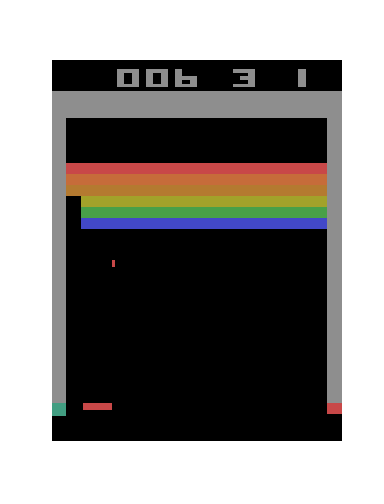
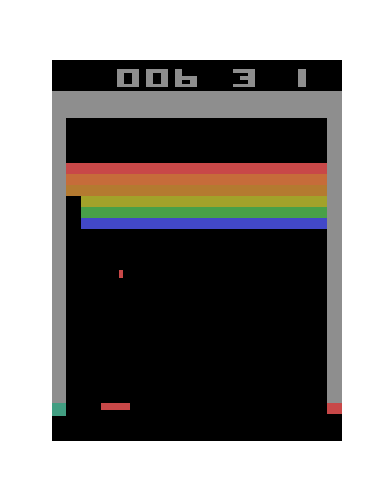
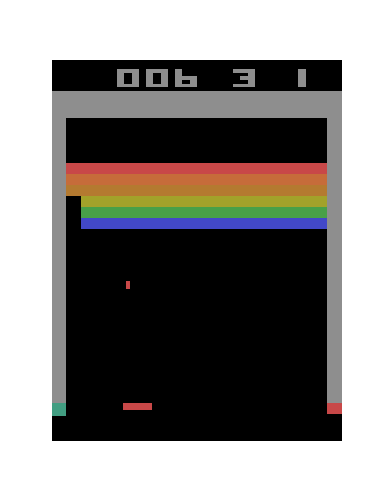
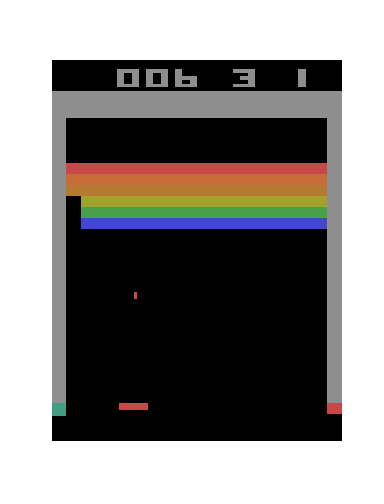
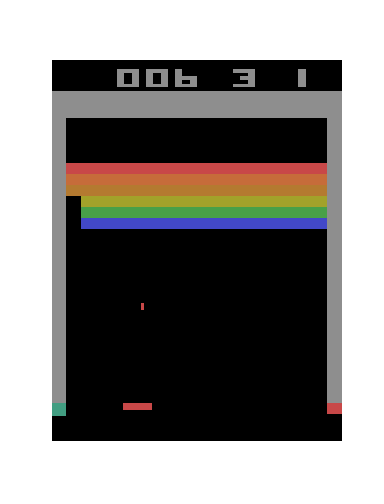
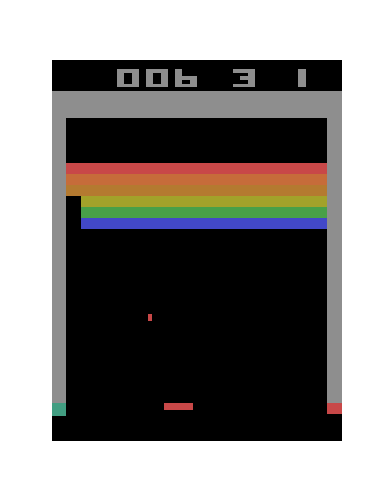
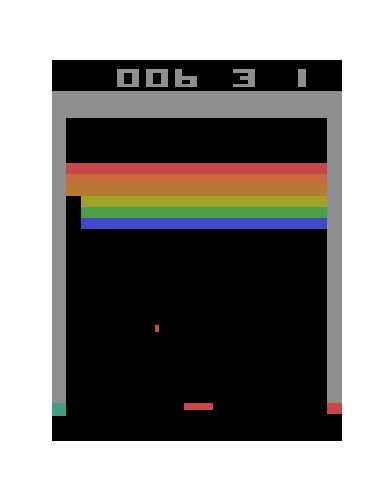
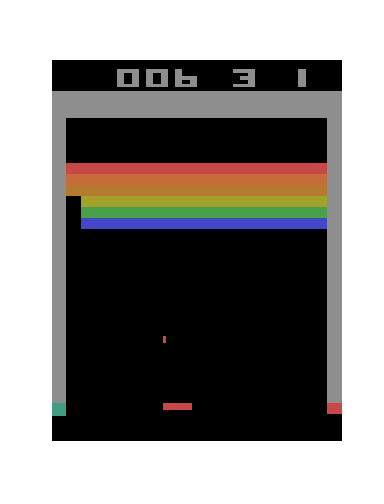
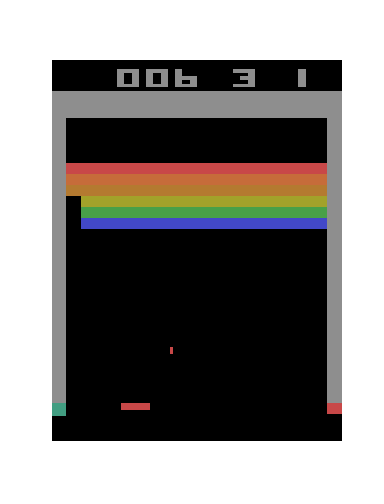
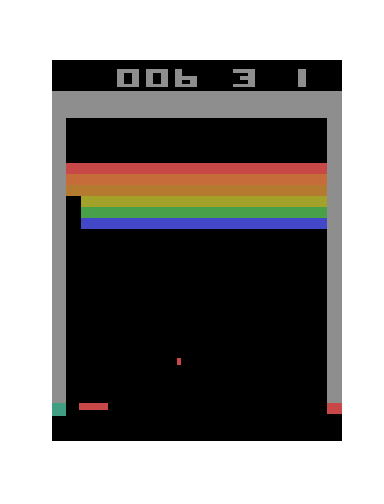
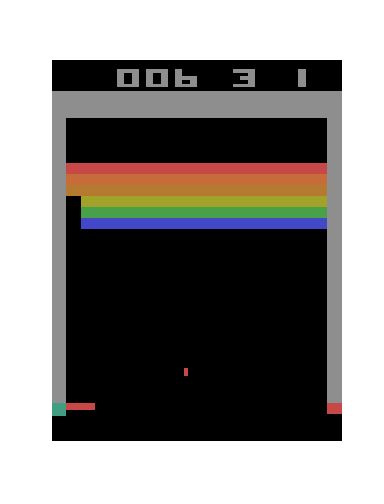
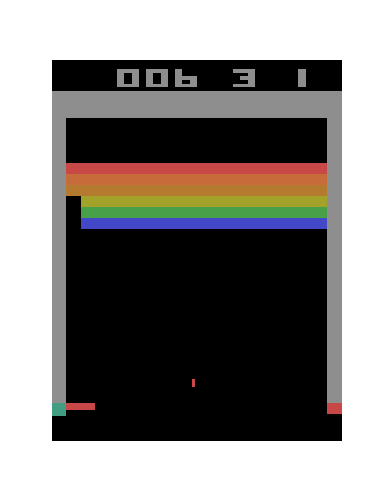
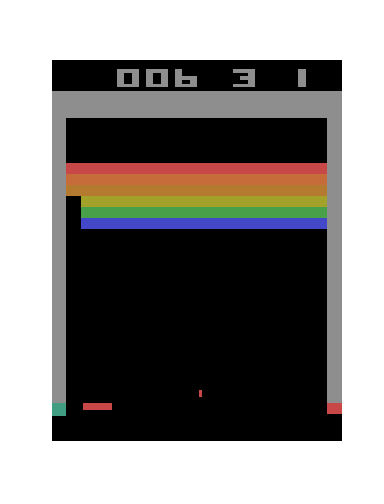
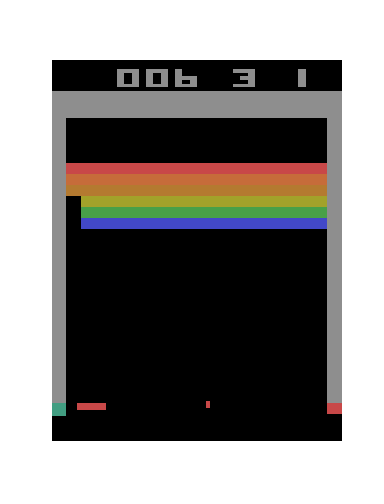
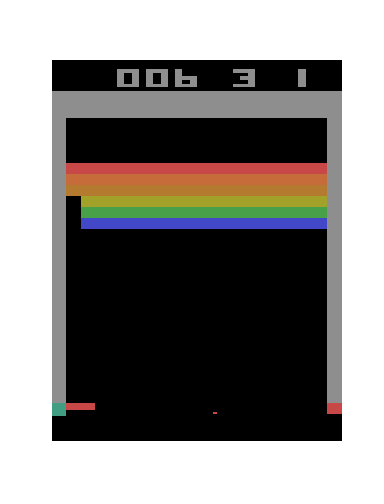
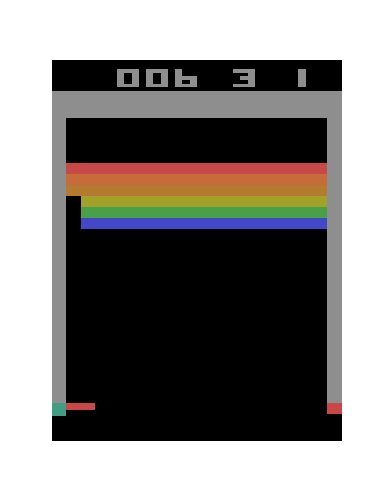
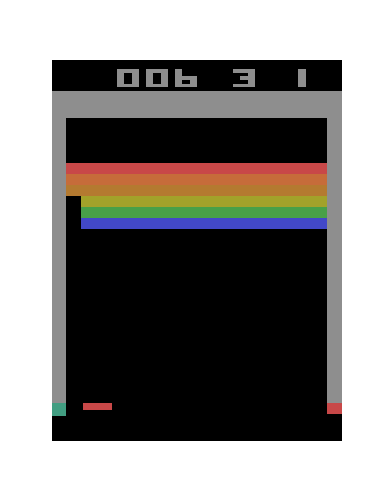
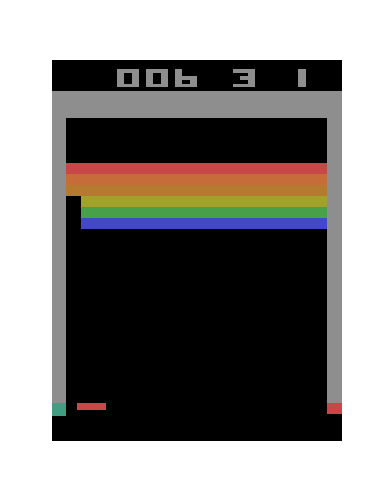
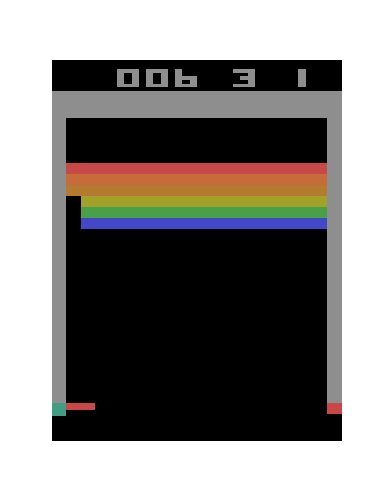
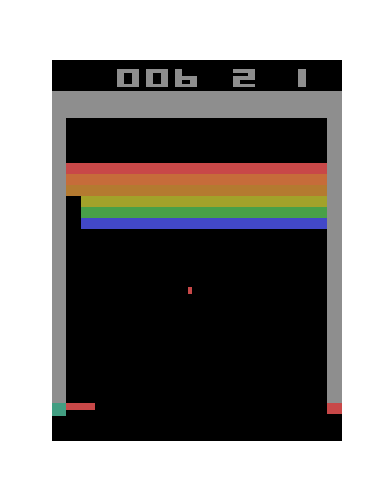
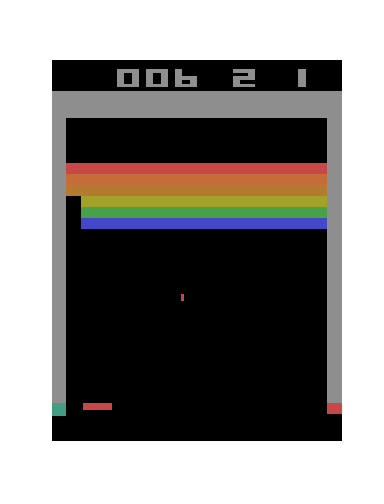
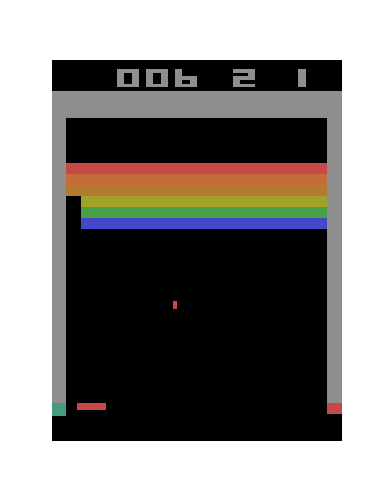
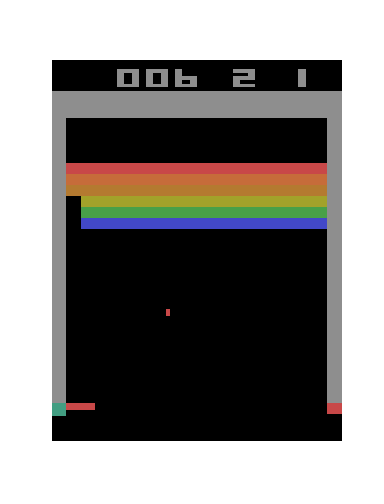
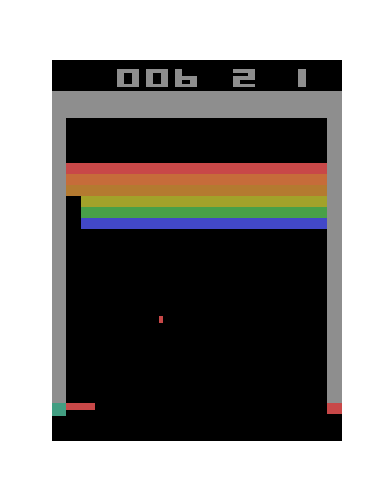
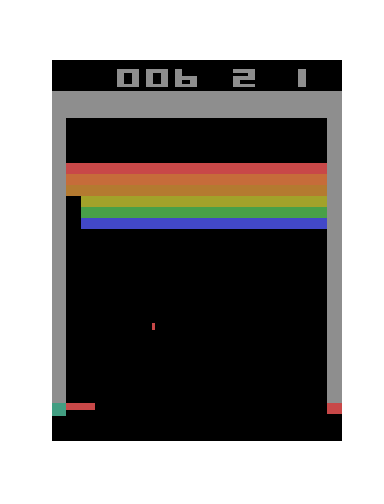
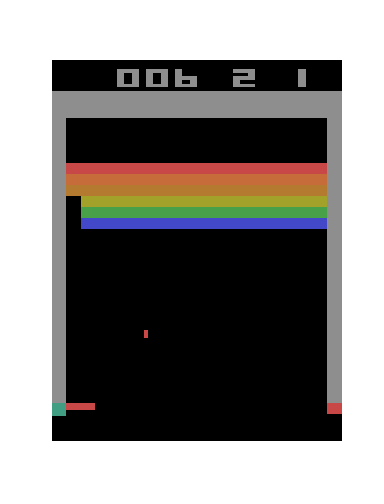
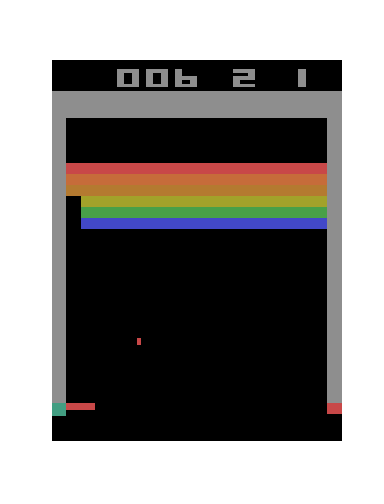
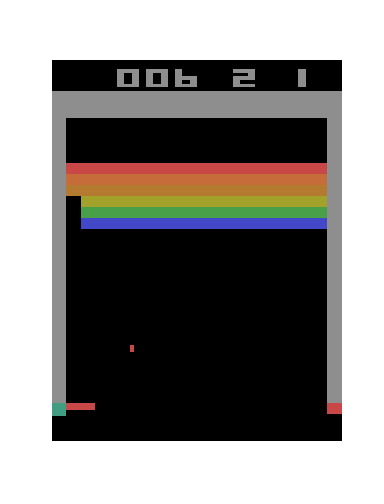
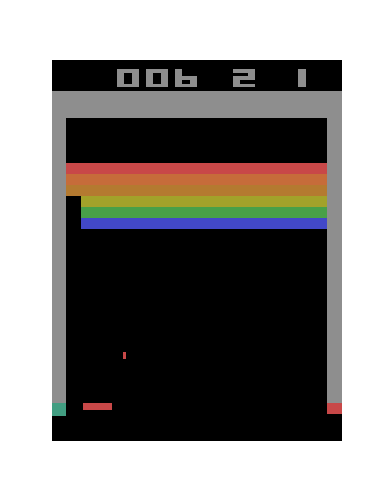
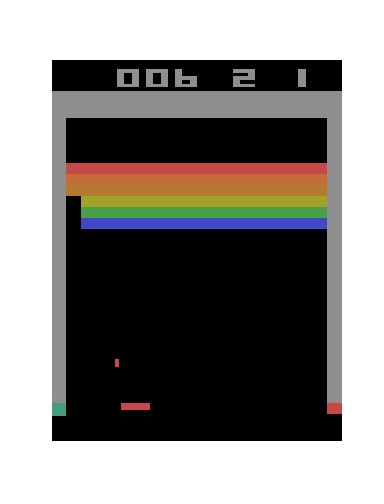
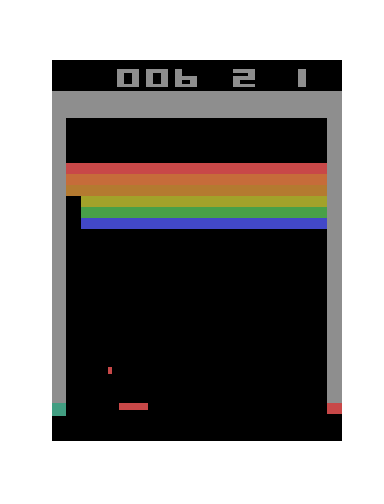
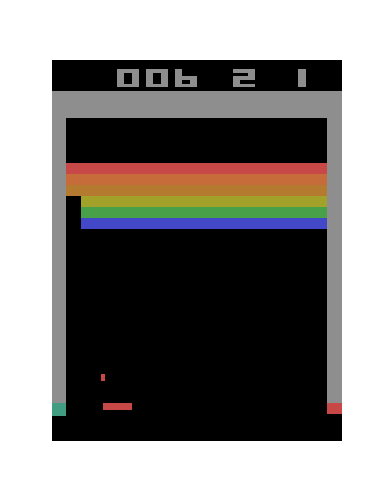
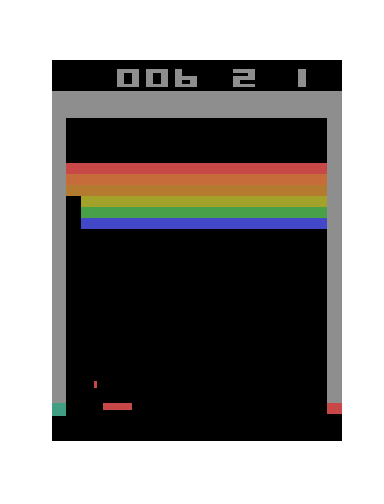
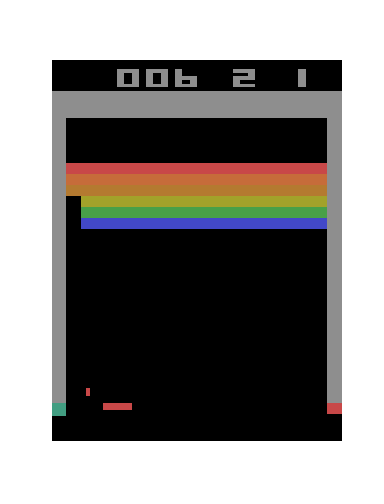
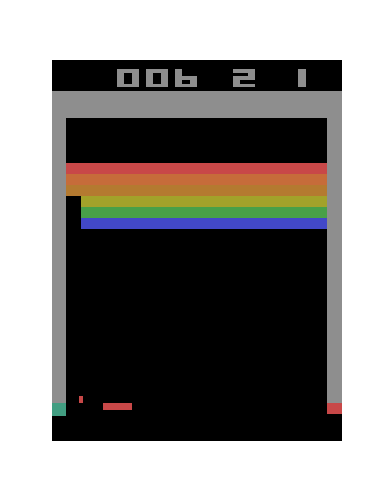
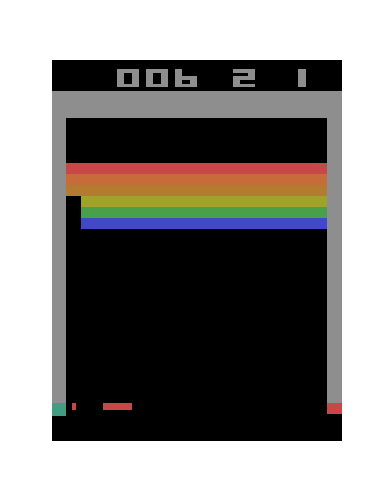
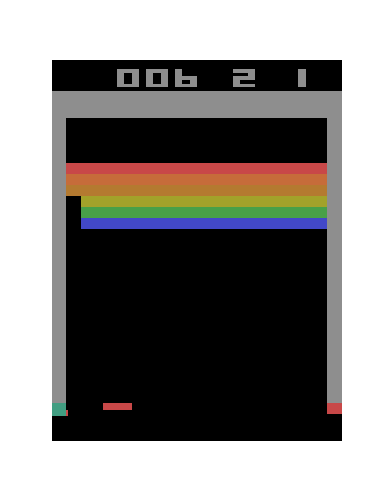
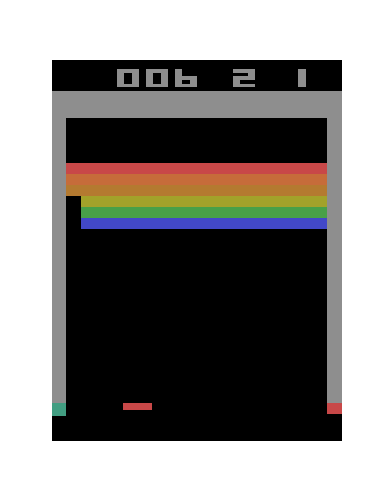
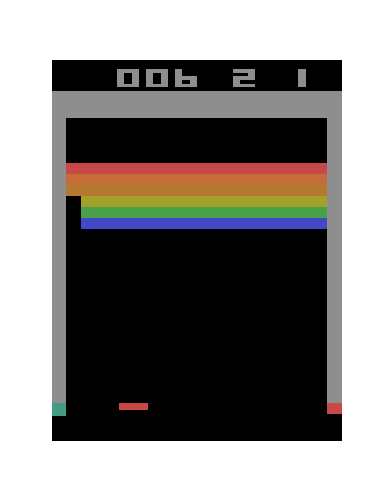
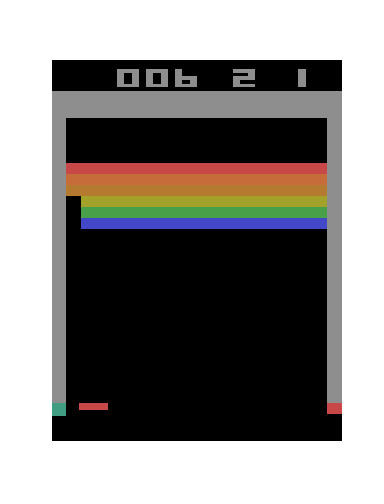
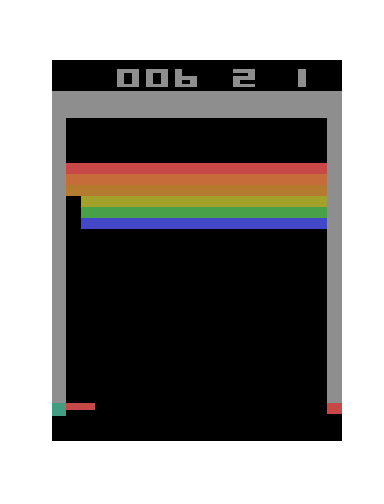
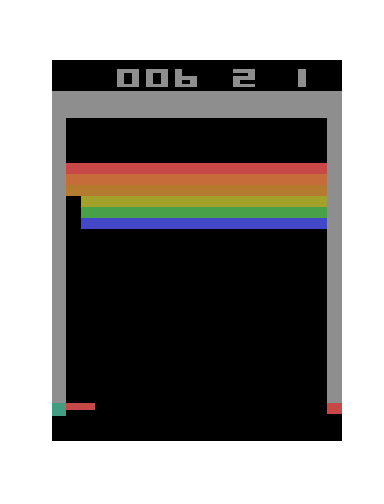
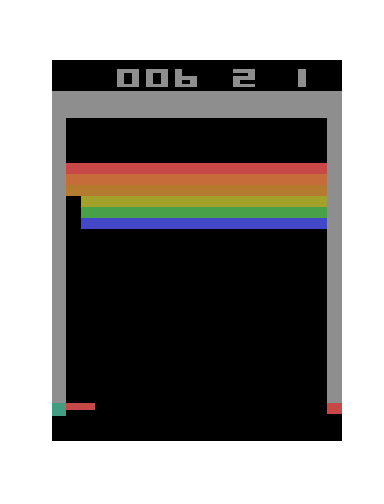
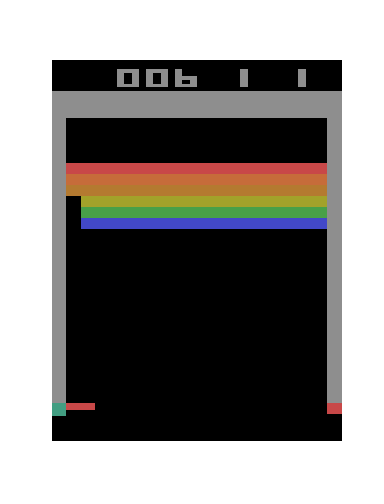
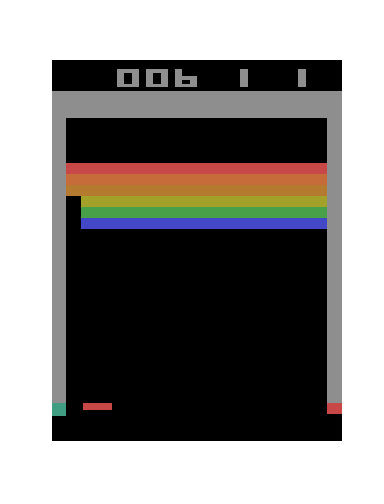
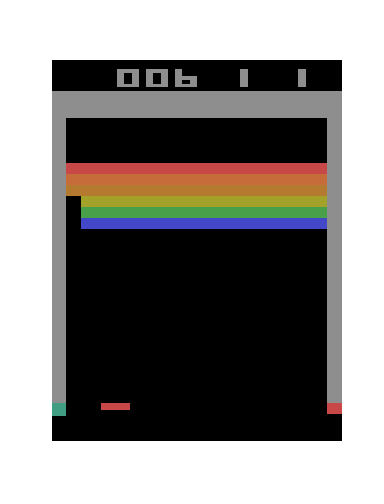
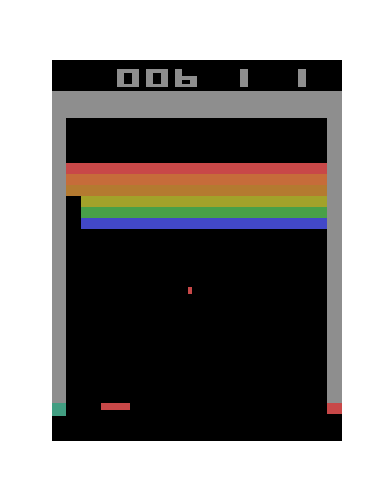
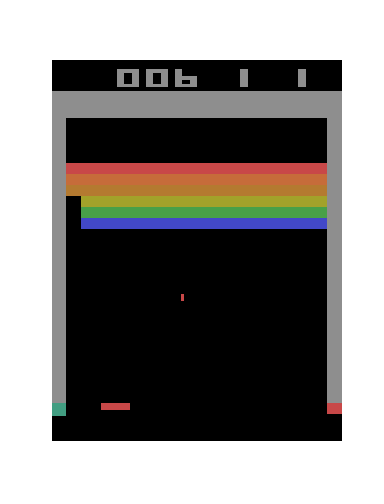
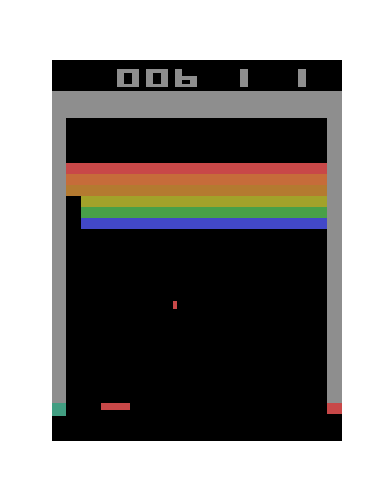
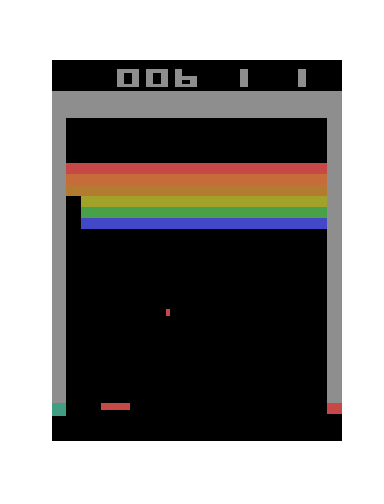
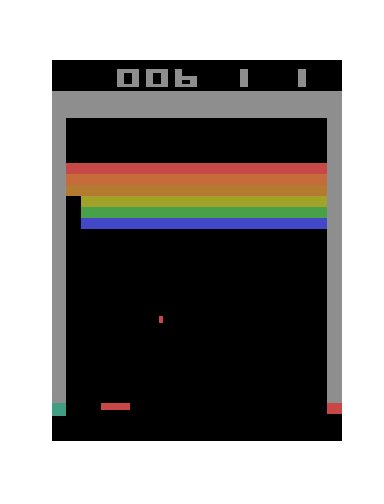
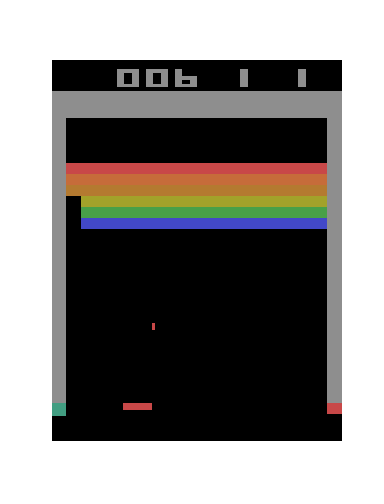
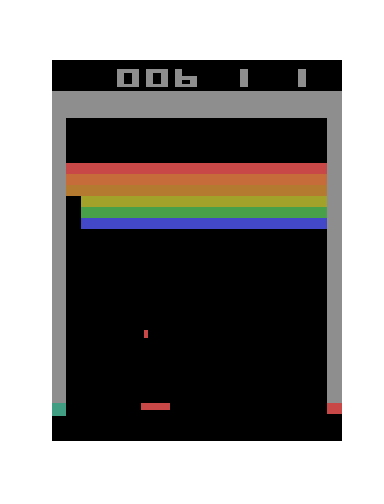
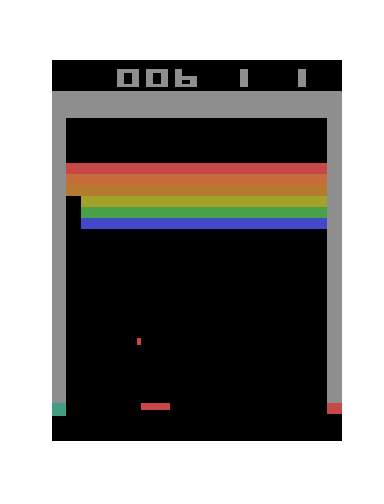
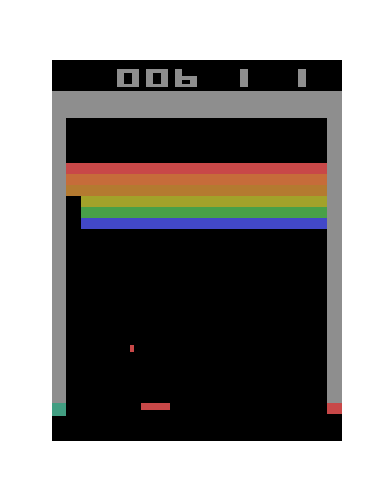
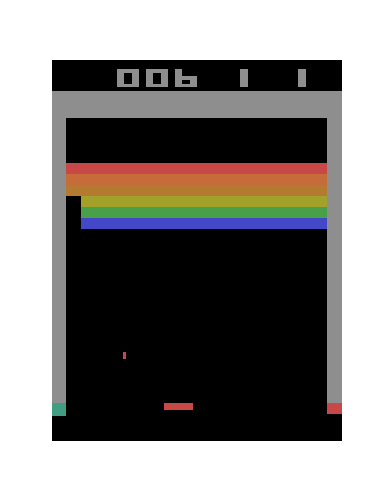
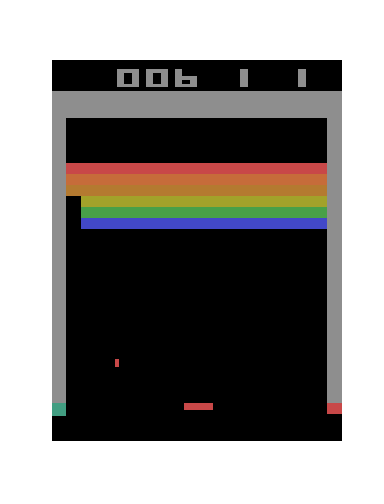
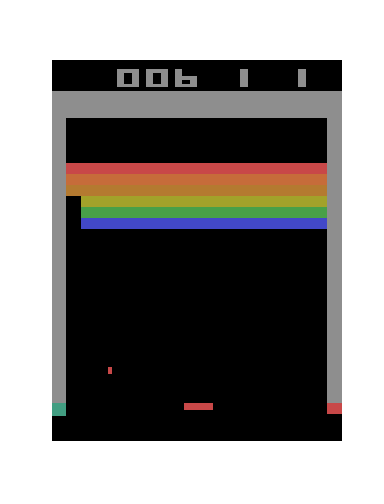
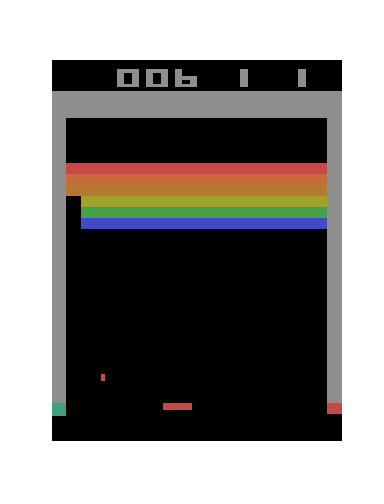
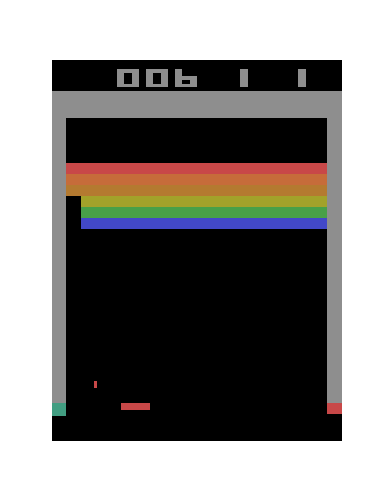
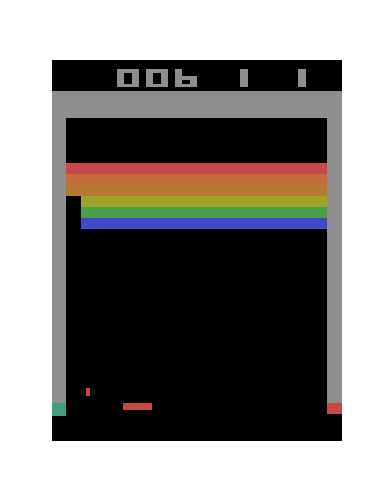
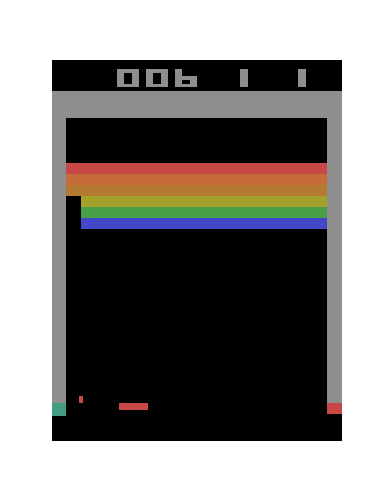
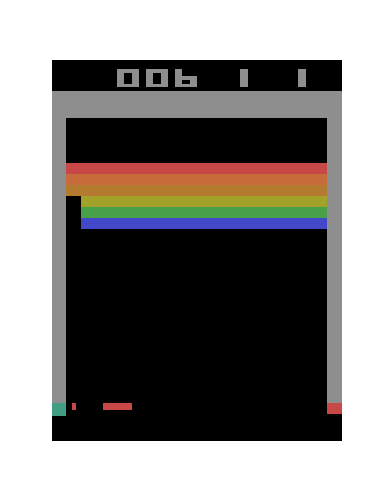
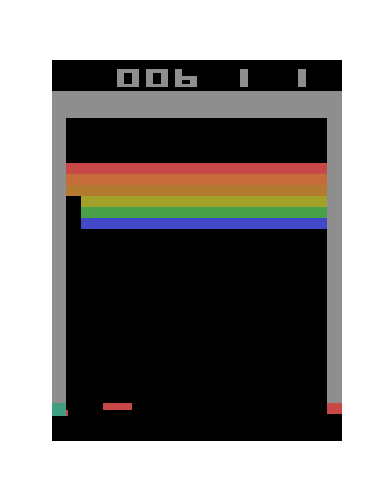
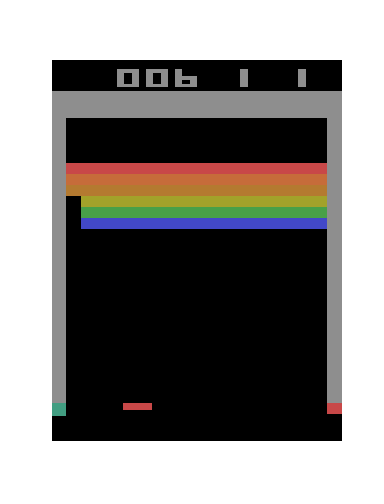
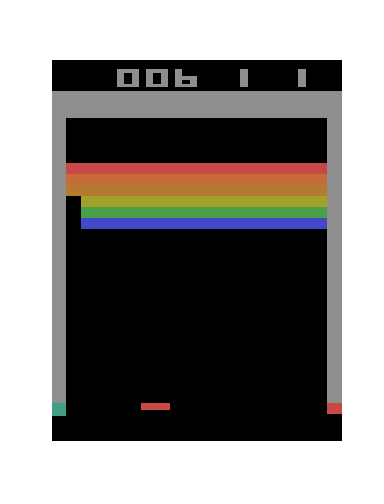
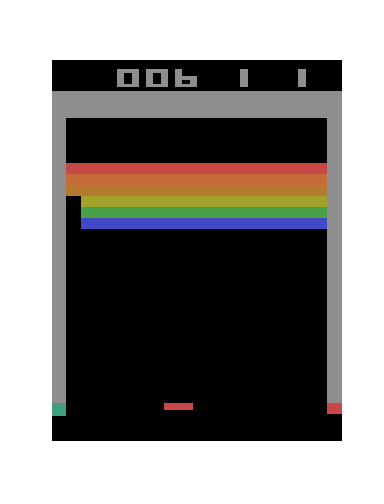
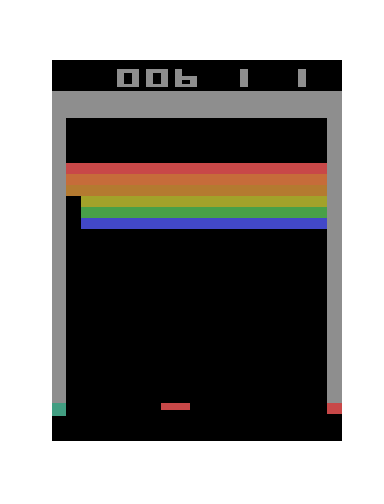
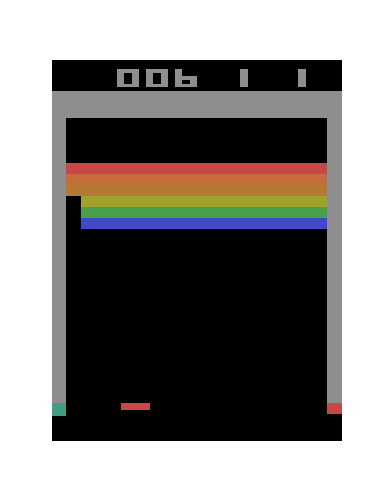
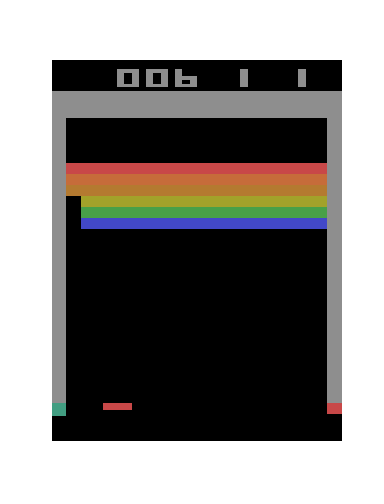

In [38]:
env = gym.make('BreakoutDeterministic-v4')

# Run a demo of the environment
observation = env.reset()
cum_reward = 0
frames = []
for t in range(5000):
    # Render into buffer. 
    frames.append(env.render(mode = 'rgb_array'))
    #[]
    action = env.action_space.sample()
    observation, reward, done, info = env.step(action)
    if done:
        break
display_frames_as_gif(frames)

In [ ]:
Qlearning

In [ ]:
q learning algoritm

In [ ]:
replay


### Preprocessing

In [40]:
from PIL import Image
INPUT_SHAPE = (84, 84, 4)

def to_grayscale(img):
    return np.mean(img, axis=2).astype(np.uint8)

def downsample(img):
    return img[::2, ::2]

def preprocess(img):
    return to_grayscale(downsample(img))


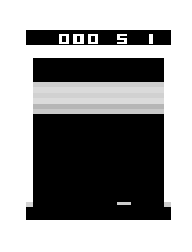
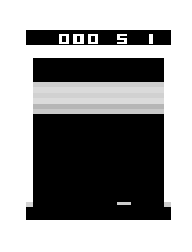
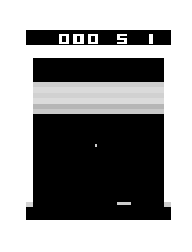
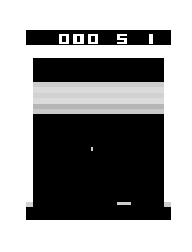
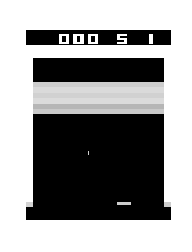
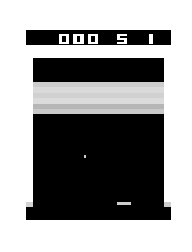
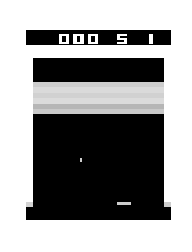
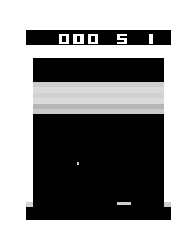
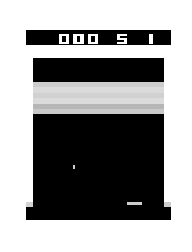
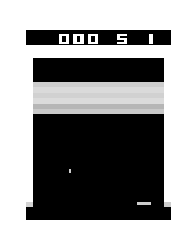
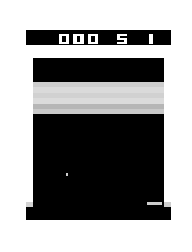
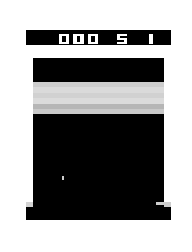
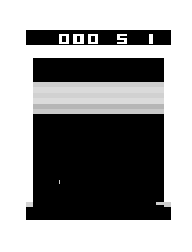
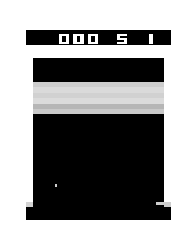
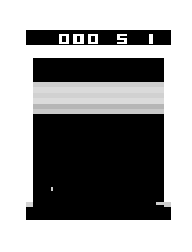
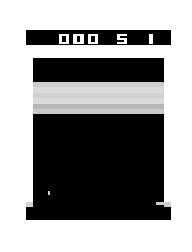
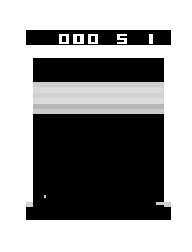
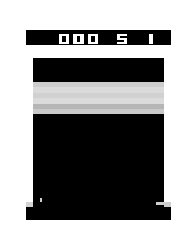
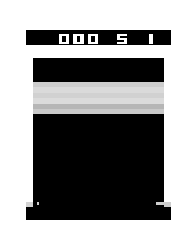
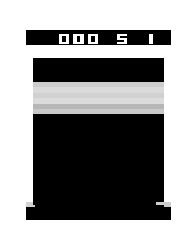
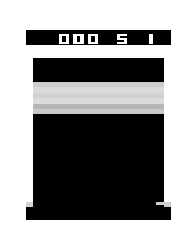
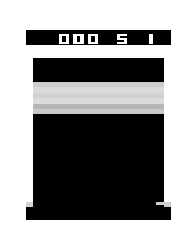
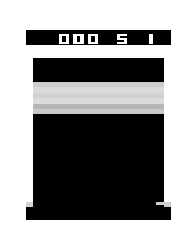
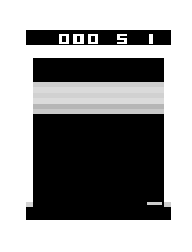
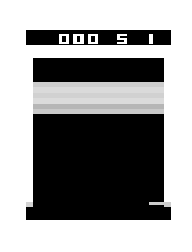
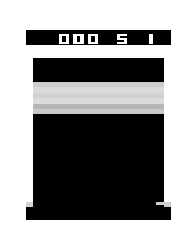
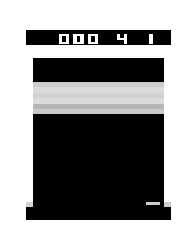
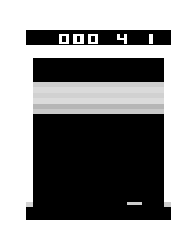
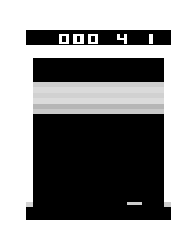
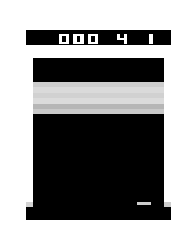
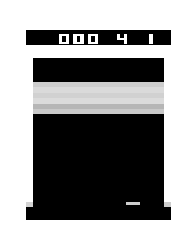
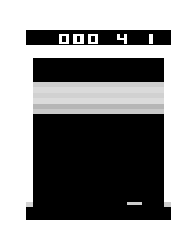
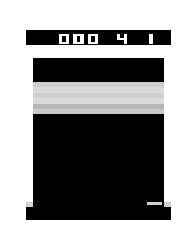
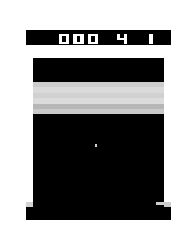
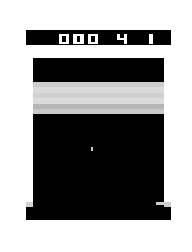
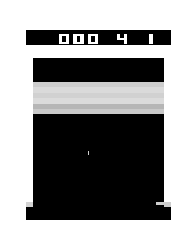
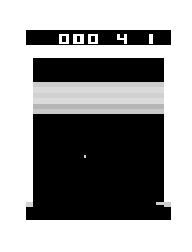
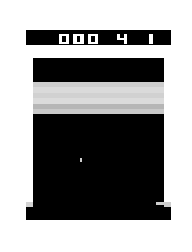
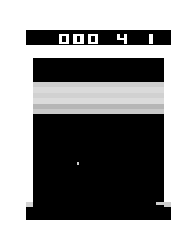
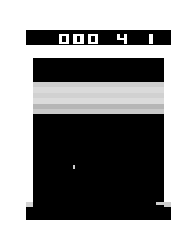
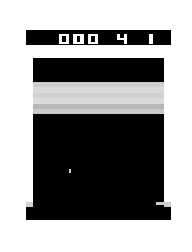
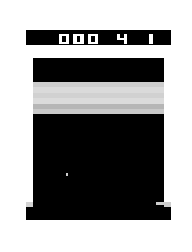
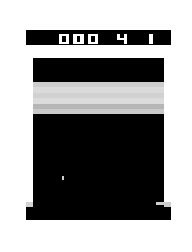
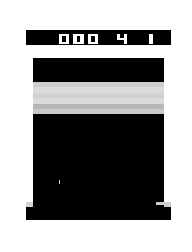
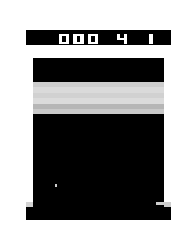
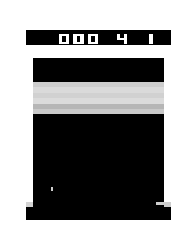
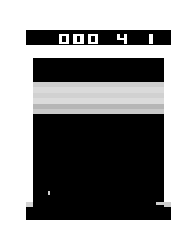
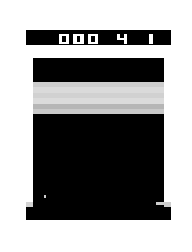
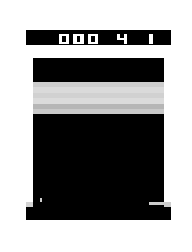
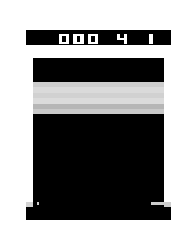
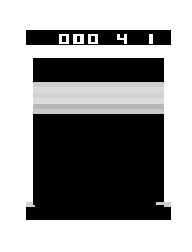
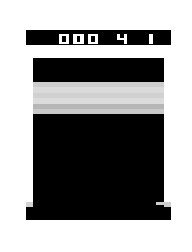
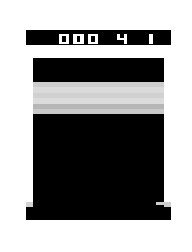
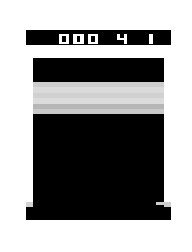
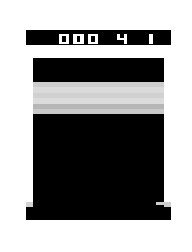
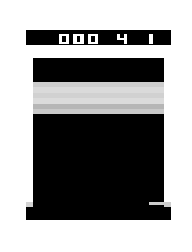
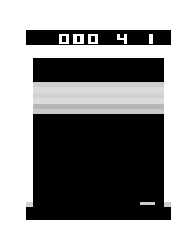
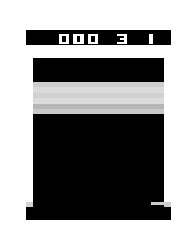
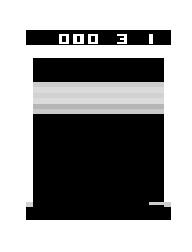
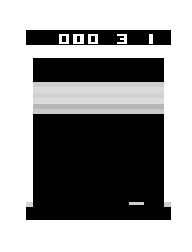
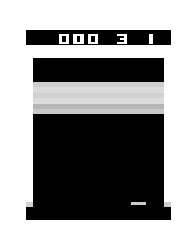
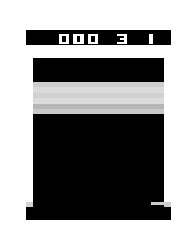
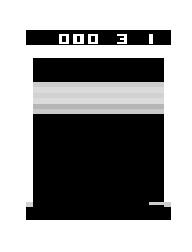
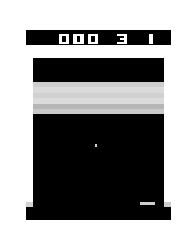
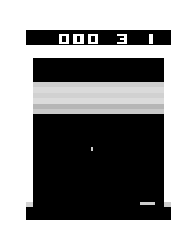
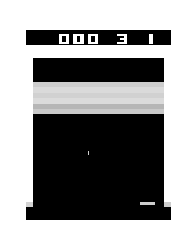
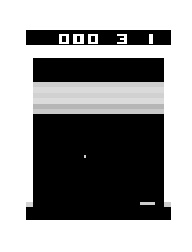
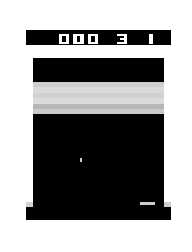
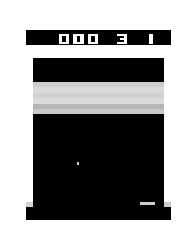
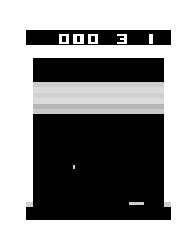
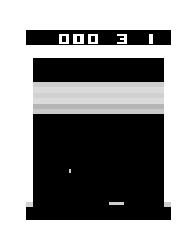
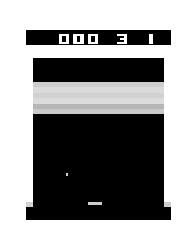
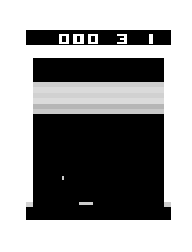
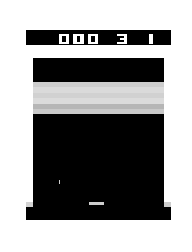
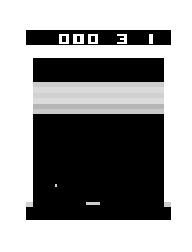
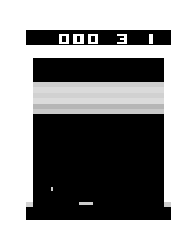
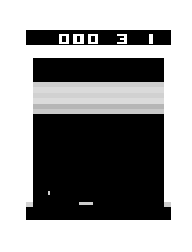
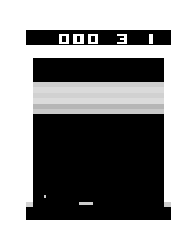
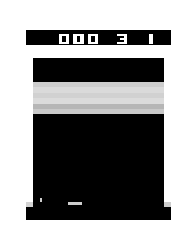
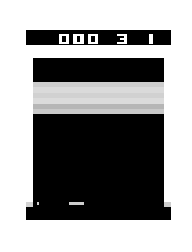
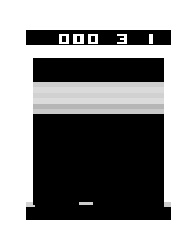
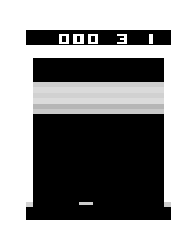
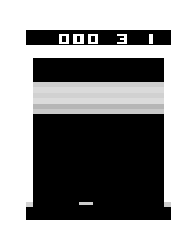
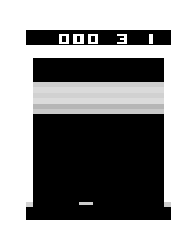
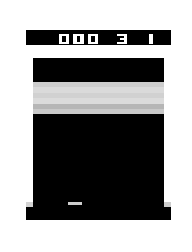
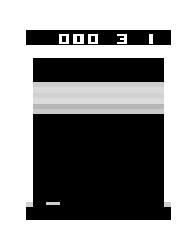
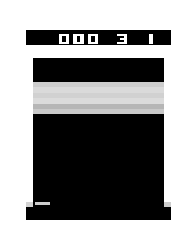
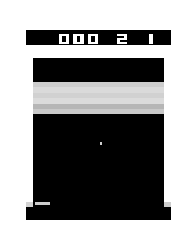
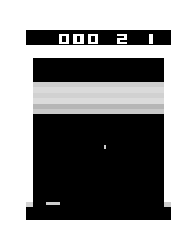
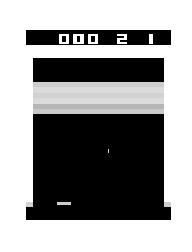
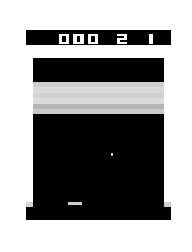
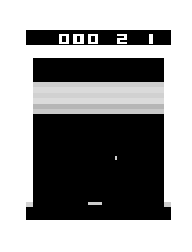
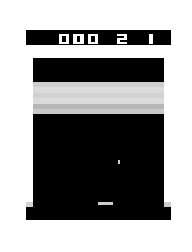
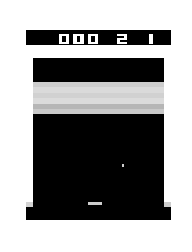
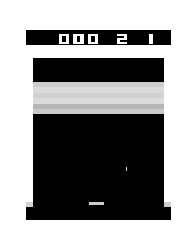
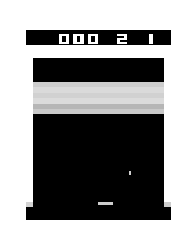
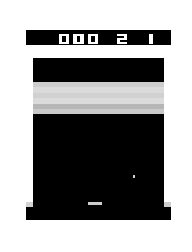
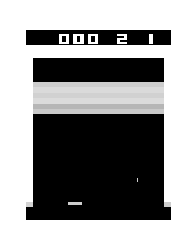
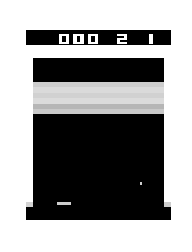
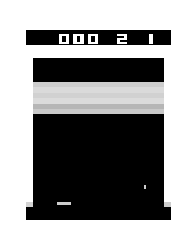
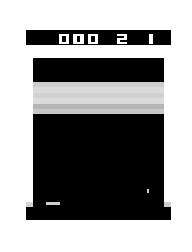
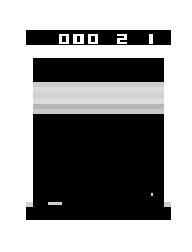
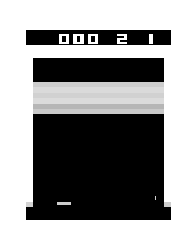
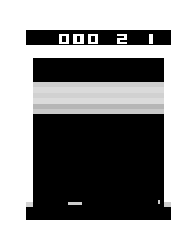
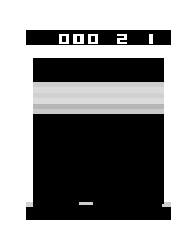
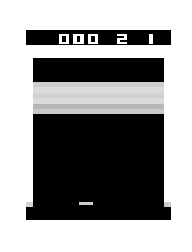
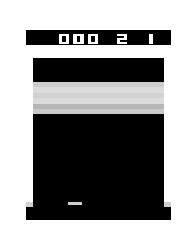
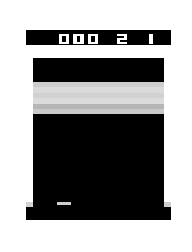
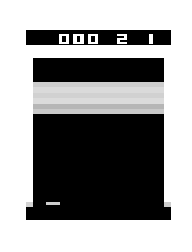
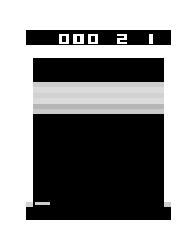
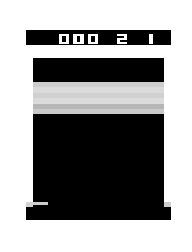
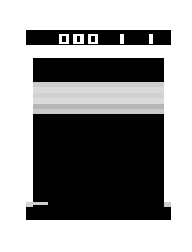
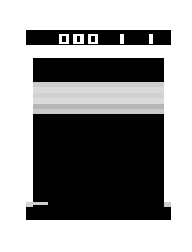
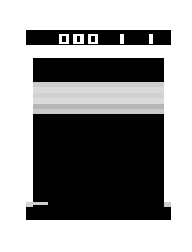
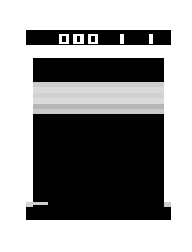
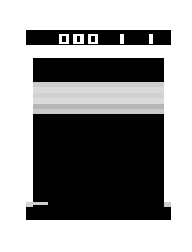
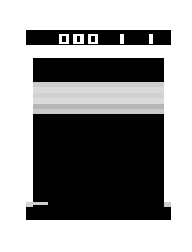
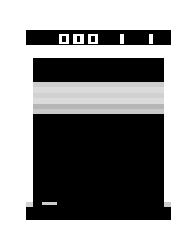
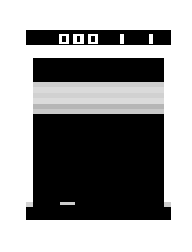
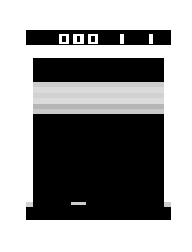
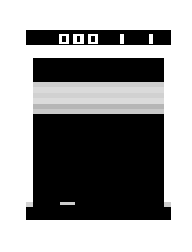
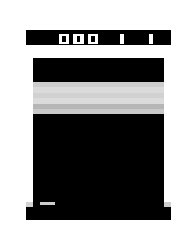
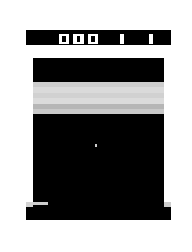
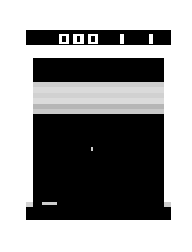
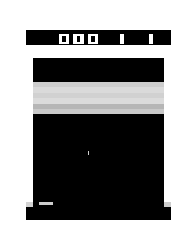
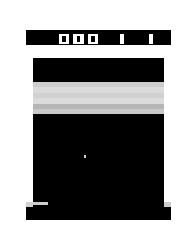
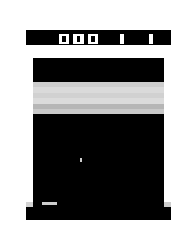
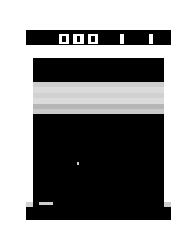
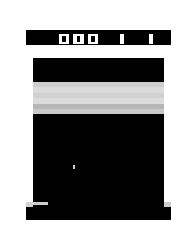
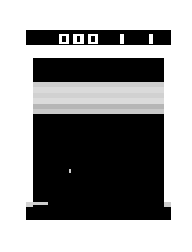
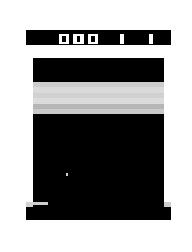
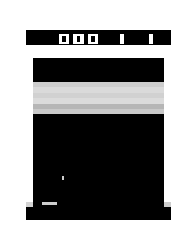
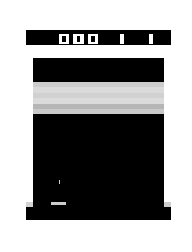
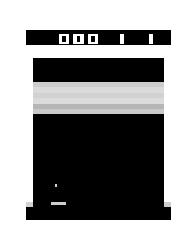
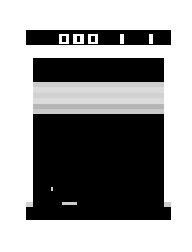
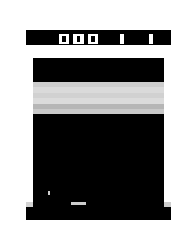
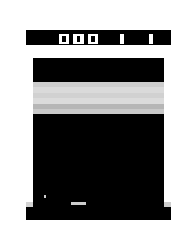
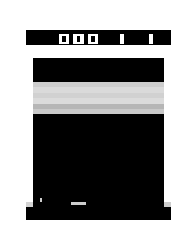
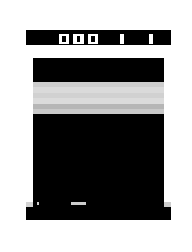
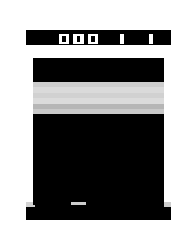
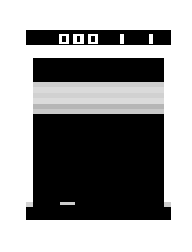
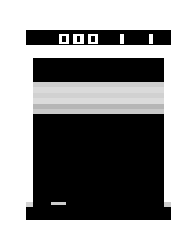
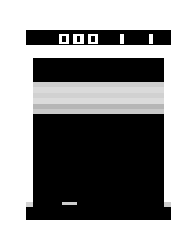
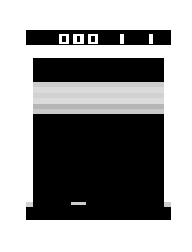
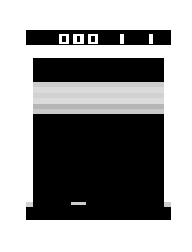
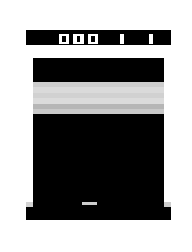

In [41]:
env = gym.make('BreakoutDeterministic-v4')

# Run a demo of the environment
observation = env.reset()
cum_reward = 0
frames = []
for t in range(5000):
    # Render into buffer. 
    frames.append(preprocess(env.render(mode = 'rgb_array')))
    action = env.action_space.sample()
    observation, reward, done, info = env.step(action)
    if done:
        break
display_frames_as_gif(frames)

In [ ]:
from collections import deque

batch_size = 32
INPUT_SHAPE = (84, 84, 4)
memory = deque(maxlen=memory_size)

In [ ]:
import random

def get_sample_batch():
    return random.sample(memory, batch_size)

In [ ]:
def reshape_state(state):
    return np.reshape(state, (1,) + state.shape)

In [ ]:
def train_data():
    history = np.zeros(((batch_size,) + INPUT_SHAPE))
    next_history = np.zeros(((batch_size,) + INPUT_SHAPE))
    action = np.zeros((batch_size,), dtype="uint8")
    reward = np.zeros((batch_size,), dtype="uint8")
    done = np.zeros((batch_size,), dtype="bool")

    sample_batch = get_sample_batch()

    for i in range(self.batch_size):
        history[i] = sample_batch[i][0]
        next_history[i] = sample_batch[i][3]
        action[i] = sample_batch[i][1]
        reward[i] = sample_batch[i][2]
        done[i] = sample_batch[i][4]

    return history, next_history, action, reward, done

In [ ]:
 def train_replay(iteration):

        if len(memory) < batch_size:
            return

        target = np.zeros((batch_size, action_size))

        history, next_history, action, reward, done = train_data()
        next_targets = model.predict([next_history, np.ones((batch_size, action_size))])

        for i in range(self.batch_size):
            if done[i]:
                target[i][action[i]] = reward[i]
            else:
                target[i][action[i]] = reward[i] + gamma * np.amax(next_targets[i])

        train([history, to_categorical(action, num_classes=action_size)], target)
     
        update_epsilon(iteration)

In [ ]:
Model

In [ ]:
replay_memory

In [9]:
state_size = env.observation_space.shape
action_size = env.action_space.n
learning_rate = 0.001
gamma = 0.90
exploration_rate = 1.0
exploration_min = 0.01
exploration_decay = 0.995
memory = deque(maxlen=10000) #Efficient list with maximum length for memory conservation
randBinList = lambda n: [random.randint(0, 1) for b in range(1, n + 1)]


In [10]:
def create_model(): 


In [1]:
def act(self, state):
        #Buttons: ['B', 'A', 'MODE', 'START', 'UP', 'DOWN', 'LEFT', 'RIGHT', 'C', 'Y', 'X', 'Z']
        if np.random.random() <= self.exploration_rate:
            return self.randBinList(self.action_size)
        q_values = self.model.predict(state)
        return q_values[0]

In [2]:
def get_sample_batch(self, sample_batch_size):
        return random.sample(self.memory, sample_batch_size)

In [3]:
def replay(self, sample_batch_size):

        if len(self.memory) < sample_batch_size:
            return

        sample_batch = self.get_sample_batch(sample_batch_size)
        for state, action, reward, next_state, done in sample_batch:

            if done:
                Q_values = np.zeros((self.action_size, ))
                Q_values[np.argmax(action)] = reward
            else:
                Q_values = np.zeros((self.action_size, ))
                prediction = self.predict(next_state)
                Q_values[np.argmax(action)] = reward + self.gamma * np.max(prediction, axis=1)

            # state = np.reshape(state, (1,) + self.state_size)
            self.train(state, Q_values.reshape((1, self.action_size)))
        if self.exploration_rate > self.exploration_min:
            self.exploration_rate *= self.exploration_decay

In [11]:
episodes = 1000

for index_episode in range(episodes):
                state = env.reset()
                state = np.reshape(state, (1,)+state_size)

                done = False
                tot_reward = 0

                while not done:
                    env.render()
                    action = self.agent.act(state)
                    next_state, reward, done, _ = env.step(action)
                    next_state = np.reshape(next_state, (1,)+state_size)
                    self.agent.remember(state, action, reward, next_state, done)
                    state = next_state
                    tot_reward += reward
                #if (index_episode % self.checkpoint == 0 and index_episode is not 0):
                #    self.agent.save_model_and_memory(WEIGHT_BACKUP_NAME, self.backup_folder)
                print("Episode {}# Score: {}".format(index_episode, tot_reward))
                agent.replay(self.sample_batch_size)
                #self.env.reset()

NotImplementedError: abstract

## Linker for å lære mer om Reinforcement learning og Q learning

[simple-reinforcement-learning-with-tensorflow](https://medium.com/emergent-future/simple-reinforcement-learning-with-tensorflow-part-0-q-learning-with-tables-and-neural-networks-d195264329d0)

[lets-build-an-atari-ai](https://becominghuman.ai/lets-build-an-atari-ai-part-0-intro-to-rl-9b2c5336e0ec)